In [103]:
import warnings
warnings.filterwarnings('ignore')

import math
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

data_dir = '/home/mnedal/data'

# solar radius in arcsec in instruments FoV
rsun_aia      = 949.556184
rsun_suvi     = 949.1129337297962
rsun_lasco_c2 = 948.9823639616588
rsun_lasco_c3 = 948.9798944687567

# 1.	Blues
# 2.	Greens
# 3.	Greys
# 4.	Oranges
# 5.	Purples
# 6.	Reds

plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

In [104]:
def generate_centered_list(center, difference, num_elements):
    """
    Generate a list of numbers centered around a given number with a specified difference
    between consecutive numbers.

    Parameters:
    center (int): The central number around which the list is generated.
    difference (int): The difference between consecutive numbers in the list.
    num_elements (int): The number of elements before and after the central number.

    Returns:
    list: A list of numbers centered around the specified central number.
    """
    return [center + difference * i for i in range(-num_elements, num_elements + 1)]

In [105]:
centered_list = generate_centered_list(160, 2, 6)
print(centered_list)

[148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172]


## Plot points from J-maps and type-IIs with error bars in one height-time profile

In [106]:
radio_filenames = glob.glob(f'{data_dir}/csv_files/SRB_heights/*.csv')
print(len(radio_filenames), *radio_filenames, sep='\n')

14
/home/mnedal/data/csv_files/SRB_heights/heights_newest_4F.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_4H.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_3MF.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_3MH.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_1LF.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_1LH.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_1UH.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_1UF.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_2F.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_2H.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_3LF.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_3LH.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_3UH.csv
/home/mnedal/data/csv_files/SRB_heights/heights_newest_3UF.csv


In [107]:
suvi_filenames = sorted(glob.glob(f'{data_dir}/jplots/suvi/clicking/*.csv'))
print(len(suvi_filenames), *suvi_filenames, sep='\n')

13
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_148.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_150.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_152.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_154.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_156.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_158.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_160.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_162.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_164.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_166.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_168.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_170.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_172.csv


In [108]:
df_radio = pd.read_csv(radio_filenames[0])
df_radio.head()

Unnamed: 0          Time  1 Leblanc  2 Leblanc  3 Leblanc  4 Leblanc  \
0           0  19857.736146   1.269309   1.417386   1.513250   1.585646   
1           1  19857.736225   1.276014   1.424794   1.521123   1.593874   
2           2  19857.736298   1.284571   1.434247   1.531169   1.604373   
3           3  19857.736379   1.286707   1.436605   1.533675   1.606993   
4           4  19857.736457   1.289228   1.439390   1.536635   1.610085   

     1 Mann    2 Mann    3 Mann    4 Mann  ...   3 Saito   4 Saito   1 Allen  \
0  1.188185  1.296239  1.369068  1.425911  ...  1.426888  1.434462  1.433358   
1  1.192574  1.301464  1.374898  1.432236  ...  1.434485  1.442258  1.440708   
2  1.198187  1.308151  1.382364  1.440339  ...  1.444192  1.452225  1.450143   
3  1.199590  1.309823  1.384231  1.442366  ...  1.446616  1.454715  1.452507   
4  1.201247  1.311799  1.386438  1.444763  ...  1.449479  1.457656  1.455302   

    2 Allen   3 Allen   4 Allen  1 Newkirk  2 Newkirk  3 Newkirk  4 Newkirk  
0  1.619927  1.750947  1.856188   1.601681   1.802902   1.945906   2.061947  
1  1.629195  1.761612  1.868085   1.609612   1.812957   1.957625   2.075110  
2  1.641087  1.775310  1.883386   1.619784   1.825872   1.972691   2.092047  
3  1.644066  1.778743  1.887225   1.622331   1.829109   1.976470   2.096298  
4  1.647588  1.782805  1.891769   1.625343   1.832938   1.980943   2.101330  

[5 rows x 22 columns]

In [109]:
df_radio.columns

Index(['Unnamed: 0', 'Time', '1 Leblanc', '2 Leblanc', '3 Leblanc',
       '4 Leblanc', '1 Mann', '2 Mann', '3 Mann', '4 Mann', '1 Saito',
       '2 Saito', '3 Saito', '4 Saito', '1 Allen', '2 Allen', '3 Allen',
       '4 Allen', '1 Newkirk', '2 Newkirk', '3 Newkirk', '4 Newkirk'],
      dtype='object')

In [110]:
df_radio.columns[2:]

Index(['1 Leblanc', '2 Leblanc', '3 Leblanc', '4 Leblanc', '1 Mann', '2 Mann',
       '3 Mann', '4 Mann', '1 Saito', '2 Saito', '3 Saito', '4 Saito',
       '1 Allen', '2 Allen', '3 Allen', '4 Allen', '1 Newkirk', '2 Newkirk',
       '3 Newkirk', '4 Newkirk'],
      dtype='object')

In [111]:
colors_radio_mann

[(0.8870588235294118, 0.8870588235294118, 0.8870588235294118, 1.0),
 (0.7105882352941176, 0.7105882352941176, 0.7105882352941176, 1.0),
 (0.47843137254901963, 0.47843137254901963, 0.47843137254901963, 1.0),
 (0.25098039215686274, 0.25098039215686274, 0.25098039215686274, 1.0),
 (0.0, 0.0, 0.0, 1.0)]

## Plot height-time profiles in SUVI and type II bursts

In [112]:
# burst_num = 1

# cmap_radio_newkirk = plt.get_cmap('Greens')
# colors_radio_newkirk = [cmap_radio_newkirk(i / 5) for i in range(1, 6)]

# cmap_radio_leblanc = plt.get_cmap('Oranges')
# colors_radio_leblanc = [cmap_radio_leblanc(i / 5) for i in range(1, 6)]

# cmap_radio_mann = plt.get_cmap('Greys')
# colors_radio_mann = [cmap_radio_mann(i / 5) for i in range(1, 6)]

# cmap_radio_saito = plt.get_cmap('Reds')
# colors_radio_saito = [cmap_radio_saito(i / 5) for i in range(1, 6)]

# cmap_radio_allen = plt.get_cmap('Blues')
# colors_radio_allen = [cmap_radio_allen(i / 5) for i in range(1, 6)]

# cmap_suvi = plt.get_cmap('Purples')
# color_offset = 3
# colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]


# # Extract filenames that start with '1'
# SRB = [f for f in radio_filenames if os.path.basename(f).startswith(f'heights_newest_{burst_num}')]
# # print(SRB)

# fig = plt.figure(figsize=[12,8])

# # RADIO CURVES ...
# for k, file in enumerate(sorted(SRB), start=1):
#     df_radio = pd.read_csv(file)
#     x = df_radio['Time']
    
#     ax = fig.add_subplot(2, 2, k)
#     # SUVI CURVES ...
#     for i, suvifile in enumerate(suvi_filenames):
#         df_suvi = pd.read_csv(suvifile)

#         # rename the slit angle to be PA
#         PA = int(suvifile.split('slit')[-1][1:4]) - 90
        
#         ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
#                     xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
#                     markersize=3, linewidth=1,
#                     fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
#                     ecolor=colors_suvi[i], label=rf"SUVI: {PA}$^o$")
#     # RADIO CURVES ...
#     for j, col in enumerate(df_radio.columns[2:]):
#         y = df_radio[col]
        
#         if 'Newkirk' in col:
#             curve_color = colors_radio_newkirk[j]
#         elif 'Leblanc' in col:
#             curve_color = colors_radio_leblanc[j]
#         elif 'Mann' in col:
#             curve_color = colors_radio_mann[j]
#         elif 'Saito' in col:
#             curve_color = colors_radio_saito[j]
#         elif 'Allen' in col:
#             curve_color = colors_radio_allen[j]
#         # else:
#         #     print('Error!')
        
#         ax.errorbar(x, y, xerr=0, yerr=0,
#                     markersize=3, linewidth=1,
#                     fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
#                     ecolor=curve_color, label=col)
    
#     lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
#     ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
#             fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
#     ax.xaxis_date()
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#     ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
#     ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
#     ax.set_ylim(bottom=1)
#     ax.set_xlabel('Time (UT)')
    
#     # Remove y-axis labels for the second column
#     if k % 2 == 0:
#         ax.set_ylabel('')
#     else:
#         ax.set_ylabel(r'Height ($R_\odot$)')
    
#     # Remove x-axis labels except for the last two panels
#     if burst_num == 1:
#         if k <= 2:
#             ax.set_xlabel('')
#         else:
#             ax.set_xlabel('Time (UT)')

# # Get all handles and labels
# handles, labels = ax.get_legend_handles_labels()

# # Split the legend into three parts: purple, green/colored, and blue
# purple_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('SUVI')]
# purple_labels = [label for label in labels if label.startswith('SUVI')]

# green_handles = [handles[i] for i, label in enumerate(labels) if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito', 'Allen']]
# green_labels = [label for label in labels if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito', 'Allen']]

# yellow_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('Leblanc')]
# yellow_labels = [label for label in labels if label.startswith('Leblanc')]

# grey_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('Mann')]
# grey_labels = [label for label in labels if label.startswith('Mann')]

# red_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('Saito')]
# red_labels = [label for label in labels if label.startswith('Saito')]

# blue_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('Allen')]
# blue_labels = [label for label in labels if label.startswith('Allen')]

# # Add the purple labels to the left
# fig.legend(purple_handles, purple_labels,
#            loc='upper center', bbox_to_anchor=(0.285, 1.15),
#            bbox_transform=fig.transFigure, ncol=4, title='GOES SUVI')

# # Add the green and colored labels to the middle
# fig.legend(green_handles, green_labels,
#            loc='upper center', bbox_to_anchor=(0.65, 1.15),
#            bbox_transform=fig.transFigure, ncol=5, title='Electron-density Models')

# fig.tight_layout()
# # fig.savefig(f'/home/mnedal/data/SRB_{burst_num}.pdf', format='pdf', bbox_inches='tight')
# plt.show()

['/home/mnedal/data/csv_files/SRB_heights/heights_newest_1LF.csv', '/home/mnedal/data/csv_files/SRB_heights/heights_newest_1LH.csv', '/home/mnedal/data/csv_files/SRB_heights/heights_newest_1UH.csv', '/home/mnedal/data/csv_files/SRB_heights/heights_newest_1UF.csv']


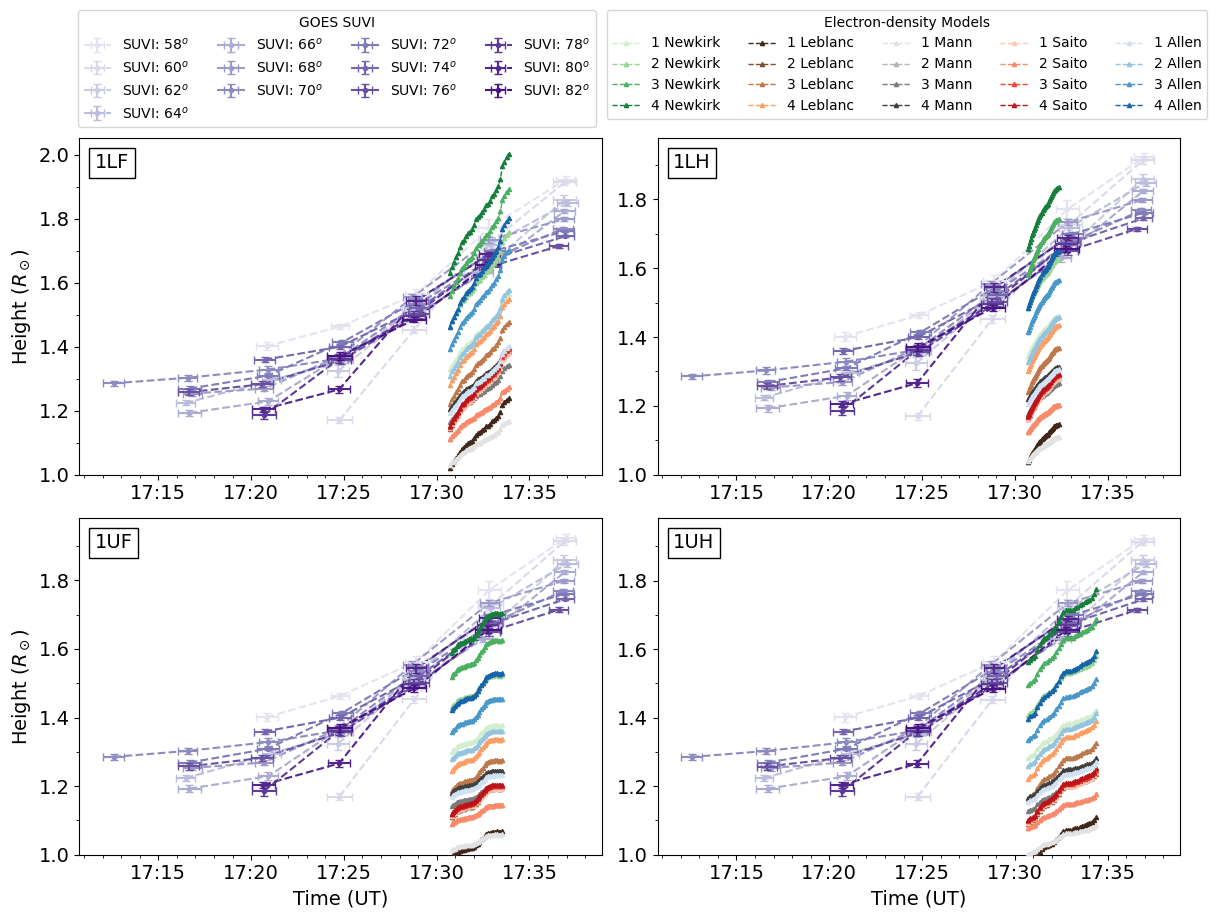

In [153]:
burst_num = 1

# --- Color maps ---
color_schemes = {
    'Newkirk': plt.get_cmap('Greens'),
    'Leblanc': plt.get_cmap('copper'), # Oranges
    'Mann': plt.get_cmap('Greys'),
    'Saito': plt.get_cmap('Reds'),
    'Allen': plt.get_cmap('Blues')
}

# shades: 4 per model
model_colors = {name: [cmap(i / 5) for i in range(1, 5)] for name, cmap in color_schemes.items()}

# --- SUVI colors ---
cmap_suvi = plt.get_cmap('Purples')
color_offset = 3
colors_suvi = [
    cmap_suvi((i + color_offset) / (len(suvi_filenames) + color_offset))
    for i in range(len(suvi_filenames))
]

# --- Data selection ---
SRB = [f for f in radio_filenames if os.path.basename(f).startswith(f'heights_newest_{burst_num}')]
print(SRB)

# --- Cache SUVI data ---
suvi_data = []
for suvifile in suvi_filenames:
    df_suvi = pd.read_csv(suvifile)
    PA = int(suvifile.split('slit')[-1][1:4]) - 90
    suvi_data.append((PA, df_suvi))

fig = plt.figure(figsize=(12, 8))

all_handles, all_labels = [], []

# --- Main plotting ---
for k, file in enumerate(sorted(SRB), start=1):
    df_radio = pd.read_csv(file)
    x = df_radio['Time']
    ax = fig.add_subplot(2, 2, k)

    # SUVI curves
    for i, (PA, df_suvi) in enumerate(suvi_data):
        h = ax.errorbar(
            df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
            xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
            markersize=3, linewidth=1.5, fmt='o--', capsize=3, capthick=1,
            barsabove=True, color=colors_suvi[i], ecolor=colors_suvi[i],
            label=rf"SUVI: {PA}$^o$"
        )
        if k == 1:
            all_handles.append(h)
            all_labels.append(rf"SUVI: {PA}$^o$")

    # RADIO curves grouped by model
    for model in model_colors.keys():
        cols = [c for c in df_radio.columns if model in c]
        for j, col in enumerate(cols):
            y = df_radio[col]
            c = model_colors[model][j % len(model_colors[model])]
            h = ax.errorbar(
                x, y, markersize=3, linewidth=1, fmt='^--',
                capsize=3, capthick=1, barsabove=True,
                color=c, ecolor=c, label=col, zorder=100
            )
            if k == 1:
                all_handles.append(h)
                all_labels.append(col)

    # Annotate subplot
    lane_name = file.split('/')[-1].split('_')[2].split('.')[0]
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, va='top', bbox=dict(facecolor='white', edgecolor='black'))
    
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.set_ylim(bottom=1)
    
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    
    if burst_num == 1 and k <= 2:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Time (UT)')


# Get all handles and labels
handles, labels = ax.get_legend_handles_labels()

# --- Group 1: SUVI (This remains separate) ---
suvi_handles = [h for h, l in zip(handles, labels) if l.startswith('SUVI')]
suvi_labels = [l for l in labels if l.startswith('SUVI')]

fig.legend(suvi_handles, suvi_labels,
           loc='upper center', bbox_to_anchor=(0.285, 1.15),
           bbox_transform=fig.transFigure, ncol=4, title='GOES SUVI')

# --- Group 2: Models ---

# Helper function to sort
def sort_by_label(handles_list, labels_list):
    """Sorts handle/label pairs based on the label text."""
    try:
        zipped = sorted(zip(handles_list, labels_list), key=lambda item: item[1])
        handles_sorted, labels_sorted = zip(*zipped)
        return list(handles_sorted), list(labels_sorted)
    except ValueError:
        return [], []

# Step 1: Create and Sort 5 separate lists
newkirk_h, newkirk_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Newkirk' in l],
    [l for l in labels if 'Newkirk' in l]
)
leblanc_h, leblanc_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Leblanc' in l],
    [l for l in labels if 'Leblanc' in l]
)
mann_h, mann_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Mann' in l],
    [l for l in labels if 'Mann' in l]
)
saito_h, saito_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Saito' in l],
    [l for l in labels if 'Saito' in l]
)
allen_h, allen_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Allen' in l],
    [l for l in labels if 'Allen' in l]
)

# Step 2: Concatenate (join) the lists in model order
# This creates the list: [N1, N2, N3, N4, L1, L2, L3, L4, ...]
final_model_handles = newkirk_h + leblanc_h + mann_h + saito_h + allen_h
final_model_labels = newkirk_l + leblanc_l + mann_l + saito_l + allen_l

# Step 3: Create the legend
# This WILL produce the diagonal layout from your screenshot
fig.legend(final_model_handles, final_model_labels,
           loc='upper center', bbox_to_anchor=(0.76, 1.15),
           bbox_transform=fig.transFigure,
           ncol=5,  
           title='Electron-density Models')

fig.tight_layout()
fig.savefig(f'{data_dir}/first_SRB.pdf',format='pdf', bbox_inches='tight')
plt.show()

In [156]:
burst_num = 2

# --- Color maps ---
color_schemes = {
    'Newkirk': plt.get_cmap('Greens'),
    'Leblanc': plt.get_cmap('copper'), # Oranges
    'Mann': plt.get_cmap('Greys'),
    'Saito': plt.get_cmap('Reds'),
    'Allen': plt.get_cmap('Blues')
}

# shades: 4 per model
model_colors = {name: [cmap(i / 5) for i in range(1, 5)] for name, cmap in color_schemes.items()}

# --- SUVI colors ---
cmap_suvi = plt.get_cmap('Purples')
color_offset = 3
colors_suvi = [
    cmap_suvi((i + color_offset) / (len(suvi_filenames) + color_offset))
    for i in range(len(suvi_filenames))
]

# --- Data selection ---
SRB = [f for f in radio_filenames if os.path.basename(f).startswith(f'heights_newest_{burst_num}')]
print(SRB)

# --- Cache SUVI data ---
suvi_data = []
for suvifile in suvi_filenames:
    df_suvi = pd.read_csv(suvifile)
    PA = int(suvifile.split('slit')[-1][1:4]) - 90
    suvi_data.append((PA, df_suvi))

fig = plt.figure(figsize=(12, 8))

all_handles, all_labels = [], []

# --- Main plotting ---
for k, file in enumerate(sorted(SRB), start=1):
    df_radio = pd.read_csv(file)
    x = df_radio['Time']
    ax = fig.add_subplot(2, 2, k)

    # SUVI curves
    for i, (PA, df_suvi) in enumerate(suvi_data):
        h = ax.errorbar(
            df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
            xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
            markersize=3, linewidth=1.5, fmt='o--', capsize=3, capthick=1,
            barsabove=True, color=colors_suvi[i], ecolor=colors_suvi[i],
            label=rf"SUVI: {PA}$^o$"
        )
        if k == 1:
            all_handles.append(h)
            all_labels.append(rf"SUVI: {PA}$^o$")

    # RADIO curves grouped by model
    for model in model_colors.keys():
        cols = [c for c in df_radio.columns if model in c]
        for j, col in enumerate(cols):
            y = df_radio[col]
            c = model_colors[model][j % len(model_colors[model])]
            h = ax.errorbar(
                x, y, markersize=3, linewidth=1, fmt='^--',
                capsize=3, capthick=1, barsabove=True,
                color=c, ecolor=c, label=col, zorder=100
            )
            if k == 1:
                all_handles.append(h)
                all_labels.append(col)

    # Annotate subplot
    lane_name = file.split('/')[-1].split('_')[2].split('.')[0]
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, va='top', bbox=dict(facecolor='white', edgecolor='black'))
    
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.set_ylim(bottom=1)
    
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    
    if burst_num == 1 and k <= 2:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Time (UT)')


# Get all handles and labels
handles, labels = ax.get_legend_handles_labels()

# --- Group 1: SUVI (This remains separate) ---
suvi_handles = [h for h, l in zip(handles, labels) if l.startswith('SUVI')]
suvi_labels = [l for l in labels if l.startswith('SUVI')]

fig.legend(suvi_handles, suvi_labels,
           loc='upper center', bbox_to_anchor=(0.285, 1.15),
           bbox_transform=fig.transFigure, ncol=4, title='GOES SUVI')

# --- Group 2: Models ---

# Helper function to sort
def sort_by_label(handles_list, labels_list):
    """Sorts handle/label pairs based on the label text."""
    try:
        zipped = sorted(zip(handles_list, labels_list), key=lambda item: item[1])
        handles_sorted, labels_sorted = zip(*zipped)
        return list(handles_sorted), list(labels_sorted)
    except ValueError:
        return [], []

# Step 1: Create and Sort 5 separate lists
newkirk_h, newkirk_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Newkirk' in l],
    [l for l in labels if 'Newkirk' in l]
)
leblanc_h, leblanc_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Leblanc' in l],
    [l for l in labels if 'Leblanc' in l]
)
mann_h, mann_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Mann' in l],
    [l for l in labels if 'Mann' in l]
)
saito_h, saito_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Saito' in l],
    [l for l in labels if 'Saito' in l]
)
allen_h, allen_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Allen' in l],
    [l for l in labels if 'Allen' in l]
)

# Step 2: Concatenate (join) the lists in model order
# This creates the list: [N1, N2, N3, N4, L1, L2, L3, L4, ...]
final_model_handles = newkirk_h + leblanc_h + mann_h + saito_h + allen_h
final_model_labels = newkirk_l + leblanc_l + mann_l + saito_l + allen_l

# Step 3: Create the legend
# This WILL produce the diagonal layout from your screenshot
fig.legend(final_model_handles, final_model_labels,
           loc='upper center', bbox_to_anchor=(0.76, 1.15),
           bbox_transform=fig.transFigure,
           ncol=5,  
           title='Electron-density Models')

fig.tight_layout()
fig.savefig(f'{data_dir}/second_SRB.pdf',format='pdf', bbox_inches='tight')
plt.show()

['/home/mnedal/data/csv_files/SRB_heights/heights_newest_2F.csv', '/home/mnedal/data/csv_files/SRB_heights/heights_newest_2H.csv']


['/home/mnedal/data/csv_files/SRB_heights/heights_newest_3MF.csv', '/home/mnedal/data/csv_files/SRB_heights/heights_newest_3MH.csv', '/home/mnedal/data/csv_files/SRB_heights/heights_newest_3LF.csv', '/home/mnedal/data/csv_files/SRB_heights/heights_newest_3LH.csv', '/home/mnedal/data/csv_files/SRB_heights/heights_newest_3UH.csv', '/home/mnedal/data/csv_files/SRB_heights/heights_newest_3UF.csv']


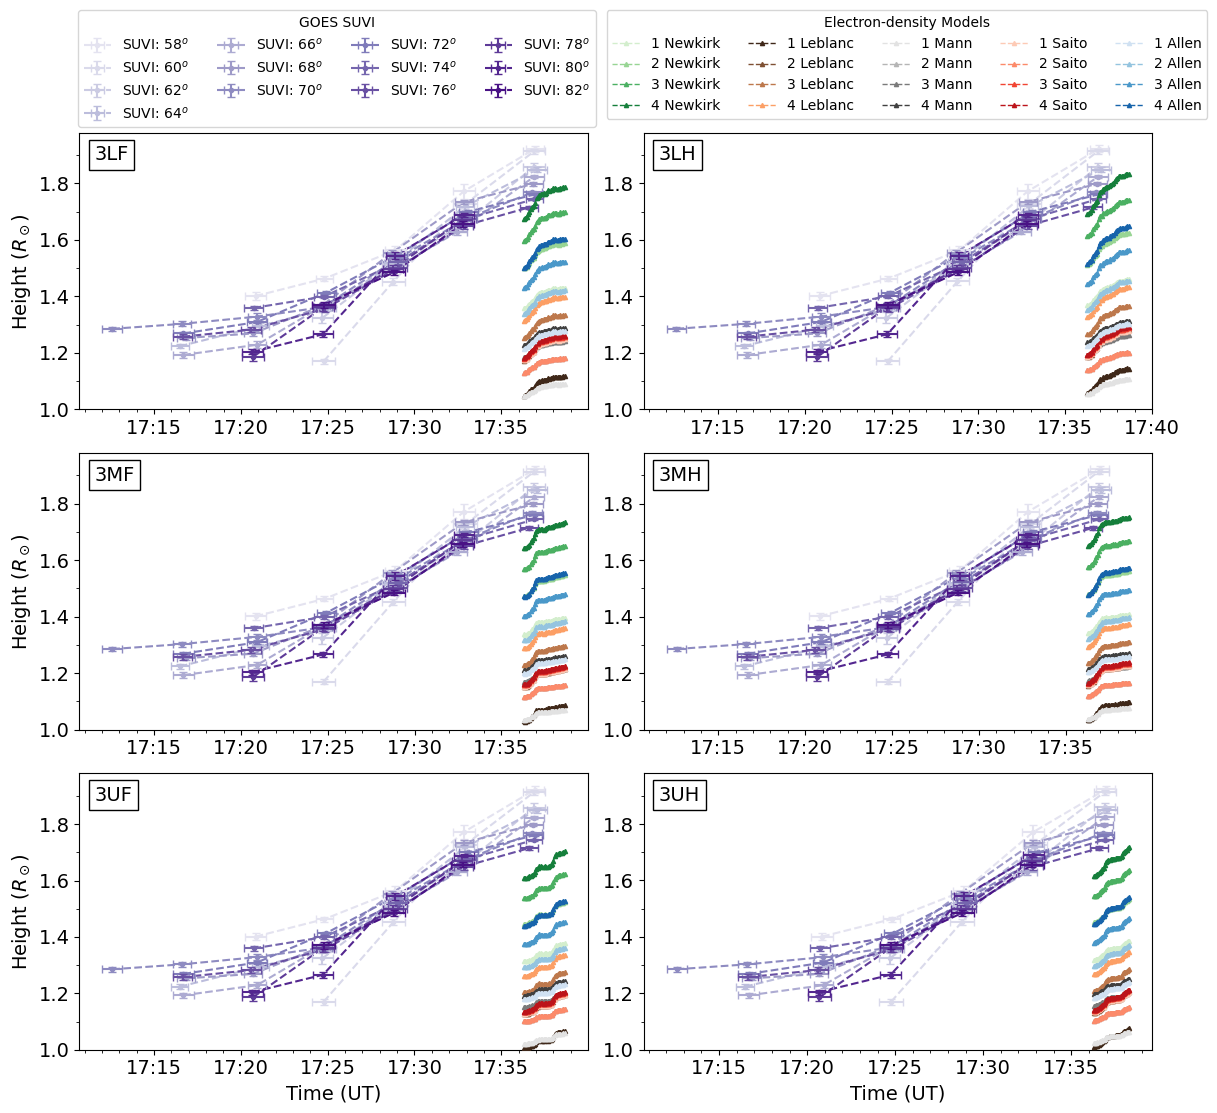

In [154]:
burst_num = 3

# --- Color maps ---
color_schemes = {
    'Newkirk': plt.get_cmap('Greens'),
    'Leblanc': plt.get_cmap('copper'), # Oranges
    'Mann': plt.get_cmap('Greys'),
    'Saito': plt.get_cmap('Reds'),
    'Allen': plt.get_cmap('Blues')
}

# shades: 4 per model
model_colors = {name: [cmap(i / 5) for i in range(1, 5)] for name, cmap in color_schemes.items()}

# --- SUVI colors ---
cmap_suvi = plt.get_cmap('Purples')
color_offset = 3
colors_suvi = [
    cmap_suvi((i + color_offset) / (len(suvi_filenames) + color_offset))
    for i in range(len(suvi_filenames))
]

# --- Data selection ---
SRB = [f for f in radio_filenames if os.path.basename(f).startswith(f'heights_newest_{burst_num}')]
print(SRB)

# --- Cache SUVI data ---
suvi_data = []
for suvifile in suvi_filenames:
    df_suvi = pd.read_csv(suvifile)
    PA = int(suvifile.split('slit')[-1][1:4]) - 90
    suvi_data.append((PA, df_suvi))

fig = plt.figure(figsize=(12, 10))

all_handles, all_labels = [], []

# --- Main plotting ---
for k, file in enumerate(sorted(SRB), start=1):
    df_radio = pd.read_csv(file)
    x = df_radio['Time']
    ax = fig.add_subplot(3, 2, k)

    # SUVI curves
    for i, (PA, df_suvi) in enumerate(suvi_data):
        h = ax.errorbar(
            df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
            xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
            markersize=3, linewidth=1.5, fmt='o--', capsize=3, capthick=1,
            barsabove=True, color=colors_suvi[i], ecolor=colors_suvi[i],
            label=rf"SUVI: {PA}$^o$"
        )
        if k == 1:
            all_handles.append(h)
            all_labels.append(rf"SUVI: {PA}$^o$")

    # RADIO curves grouped by model
    for model in model_colors.keys():
        cols = [c for c in df_radio.columns if model in c]
        for j, col in enumerate(cols):
            y = df_radio[col]
            c = model_colors[model][j % len(model_colors[model])]
            h = ax.errorbar(
                x, y, markersize=3, linewidth=1, fmt='^--',
                capsize=3, capthick=1, barsabove=True,
                color=c, ecolor=c, label=col, zorder=100
            )
            if k == 1:
                all_handles.append(h)
                all_labels.append(col)

    # Annotate subplot
    lane_name = file.split('/')[-1].split('_')[2].split('.')[0]
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, va='top', bbox=dict(facecolor='white', edgecolor='black'))
    
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.set_ylim(bottom=1)
    
    # --- Set labels only where needed ---
    # Left column: panels 1, 3, 5
    if k in [1, 3, 5]:
        ax.set_ylabel(r'Height ($R_\odot$)')
    else:
        ax.set_ylabel('')
    
    # Bottom row: panels 5, 6
    if k in [5, 6]:
        ax.set_xlabel('Time (UT)')
    else:
        ax.set_xlabel('')

# Get all handles and labels
handles, labels = ax.get_legend_handles_labels()

# --- Group 1: SUVI (This remains separate) ---
suvi_handles = [h for h, l in zip(handles, labels) if l.startswith('SUVI')]
suvi_labels = [l for l in labels if l.startswith('SUVI')]

fig.legend(suvi_handles, suvi_labels,
           loc='upper center', bbox_to_anchor=(0.285, 1.115),
           bbox_transform=fig.transFigure, ncol=4, title='GOES SUVI')

# --- Group 2: Models ---

# Helper function to sort
def sort_by_label(handles_list, labels_list):
    """Sorts handle/label pairs based on the label text."""
    try:
        zipped = sorted(zip(handles_list, labels_list), key=lambda item: item[1])
        handles_sorted, labels_sorted = zip(*zipped)
        return list(handles_sorted), list(labels_sorted)
    except ValueError:
        return [], []

# Step 1: Create and Sort 5 separate lists
newkirk_h, newkirk_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Newkirk' in l],
    [l for l in labels if 'Newkirk' in l]
)
leblanc_h, leblanc_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Leblanc' in l],
    [l for l in labels if 'Leblanc' in l]
)
mann_h, mann_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Mann' in l],
    [l for l in labels if 'Mann' in l]
)
saito_h, saito_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Saito' in l],
    [l for l in labels if 'Saito' in l]
)
allen_h, allen_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Allen' in l],
    [l for l in labels if 'Allen' in l]
)

# Step 2: Concatenate (join) the lists in model order
# This creates the list: [N1, N2, N3, N4, L1, L2, L3, L4, ...]
final_model_handles = newkirk_h + leblanc_h + mann_h + saito_h + allen_h
final_model_labels = newkirk_l + leblanc_l + mann_l + saito_l + allen_l

# Step 3: Create the legend
# This WILL produce the diagonal layout from your screenshot
fig.legend(final_model_handles, final_model_labels,
           loc='upper center', bbox_to_anchor=(0.76, 1.115),
           bbox_transform=fig.transFigure,
           ncol=5,  
           title='Electron-density Models')

fig.tight_layout()
fig.savefig(f'{data_dir}/third_SRB.pdf',format='pdf', bbox_inches='tight')
plt.show()

['/home/mnedal/data/csv_files/SRB_heights/heights_newest_4F.csv', '/home/mnedal/data/csv_files/SRB_heights/heights_newest_4H.csv']


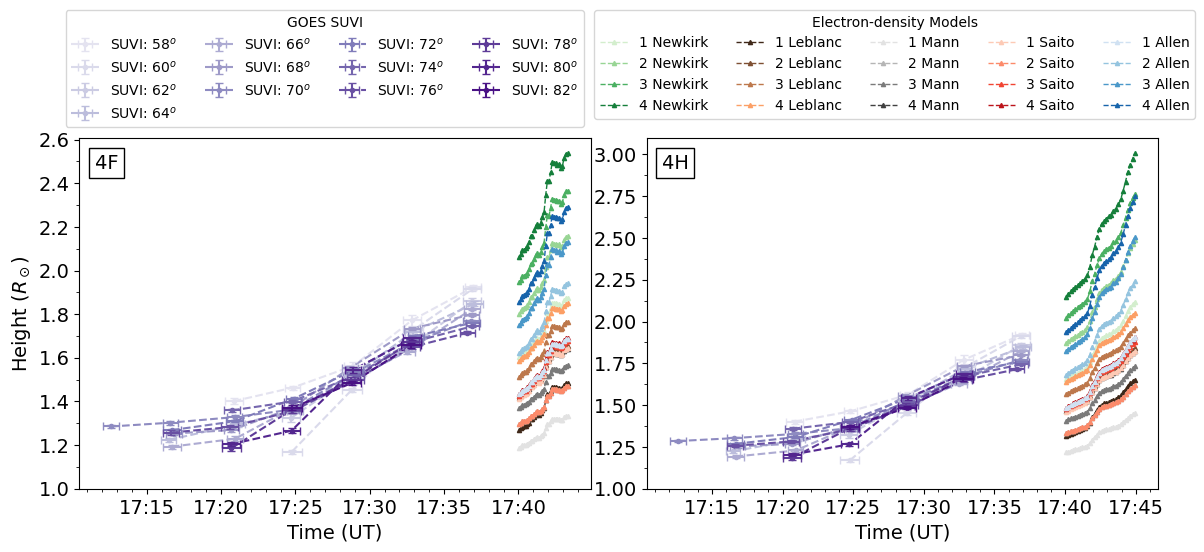

In [155]:
burst_num = 4

# --- Color maps ---
color_schemes = {
    'Newkirk': plt.get_cmap('Greens'),
    'Leblanc': plt.get_cmap('copper'), # Oranges
    'Mann': plt.get_cmap('Greys'),
    'Saito': plt.get_cmap('Reds'),
    'Allen': plt.get_cmap('Blues')
}

# shades: 4 per model
model_colors = {name: [cmap(i / 5) for i in range(1, 5)] for name, cmap in color_schemes.items()}

# --- SUVI colors ---
cmap_suvi = plt.get_cmap('Purples')
color_offset = 3
colors_suvi = [
    cmap_suvi((i + color_offset) / (len(suvi_filenames) + color_offset))
    for i in range(len(suvi_filenames))
]

# --- Data selection ---
SRB = [f for f in radio_filenames if os.path.basename(f).startswith(f'heights_newest_{burst_num}')]
print(SRB)

# --- Cache SUVI data ---
suvi_data = []
for suvifile in suvi_filenames:
    df_suvi = pd.read_csv(suvifile)
    PA = int(suvifile.split('slit')[-1][1:4]) - 90
    suvi_data.append((PA, df_suvi))

fig = plt.figure(figsize=(12, 8))

all_handles, all_labels = [], []

# --- Main plotting ---
for k, file in enumerate(sorted(SRB), start=1):
    df_radio = pd.read_csv(file)
    x = df_radio['Time']
    ax = fig.add_subplot(2, 2, k)

    # SUVI curves
    for i, (PA, df_suvi) in enumerate(suvi_data):
        h = ax.errorbar(
            df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
            xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
            markersize=3, linewidth=1.5, fmt='o--', capsize=3, capthick=1,
            barsabove=True, color=colors_suvi[i], ecolor=colors_suvi[i],
            label=rf"SUVI: {PA}$^o$"
        )
        if k == 1:
            all_handles.append(h)
            all_labels.append(rf"SUVI: {PA}$^o$")

    # RADIO curves grouped by model
    for model in model_colors.keys():
        cols = [c for c in df_radio.columns if model in c]
        for j, col in enumerate(cols):
            y = df_radio[col]
            c = model_colors[model][j % len(model_colors[model])]
            h = ax.errorbar(
                x, y, markersize=3, linewidth=1, fmt='^--',
                capsize=3, capthick=1, barsabove=True,
                color=c, ecolor=c, label=col, zorder=100
            )
            if k == 1:
                all_handles.append(h)
                all_labels.append(col)

    # Annotate subplot
    lane_name = file.split('/')[-1].split('_')[2].split('.')[0]
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, va='top', bbox=dict(facecolor='white', edgecolor='black'))
    
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.set_ylim(bottom=1)
    
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    
    if burst_num == 1 and k <= 2:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Time (UT)')


# Get all handles and labels
handles, labels = ax.get_legend_handles_labels()

# --- Group 1: SUVI (This remains separate) ---
suvi_handles = [h for h, l in zip(handles, labels) if l.startswith('SUVI')]
suvi_labels = [l for l in labels if l.startswith('SUVI')]

fig.legend(suvi_handles, suvi_labels,
           loc='upper center', bbox_to_anchor=(0.285, 1.15),
           bbox_transform=fig.transFigure, ncol=4, title='GOES SUVI')

# --- Group 2: Models ---

# Helper function to sort
def sort_by_label(handles_list, labels_list):
    """Sorts handle/label pairs based on the label text."""
    try:
        zipped = sorted(zip(handles_list, labels_list), key=lambda item: item[1])
        handles_sorted, labels_sorted = zip(*zipped)
        return list(handles_sorted), list(labels_sorted)
    except ValueError:
        return [], []

# Step 1: Create and Sort 5 separate lists
newkirk_h, newkirk_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Newkirk' in l],
    [l for l in labels if 'Newkirk' in l]
)
leblanc_h, leblanc_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Leblanc' in l],
    [l for l in labels if 'Leblanc' in l]
)
mann_h, mann_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Mann' in l],
    [l for l in labels if 'Mann' in l]
)
saito_h, saito_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Saito' in l],
    [l for l in labels if 'Saito' in l]
)
allen_h, allen_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Allen' in l],
    [l for l in labels if 'Allen' in l]
)

# Step 2: Concatenate (join) the lists in model order
# This creates the list: [N1, N2, N3, N4, L1, L2, L3, L4, ...]
final_model_handles = newkirk_h + leblanc_h + mann_h + saito_h + allen_h
final_model_labels = newkirk_l + leblanc_l + mann_l + saito_l + allen_l

# Step 3: Create the legend
# This WILL produce the diagonal layout from your screenshot
fig.legend(final_model_handles, final_model_labels,
           loc='upper center', bbox_to_anchor=(0.76, 1.15),
           bbox_transform=fig.transFigure,
           ncol=5,  
           title='Electron-density Models')

fig.tight_layout()
fig.savefig(f'{data_dir}/fourth_SRB.pdf',format='pdf', bbox_inches='tight')
plt.show()

['/home/mnedal/data/csv_files/SRB_heights/heights_newest_4F.csv', '/home/mnedal/data/csv_files/SRB_heights/heights_newest_4H.csv']


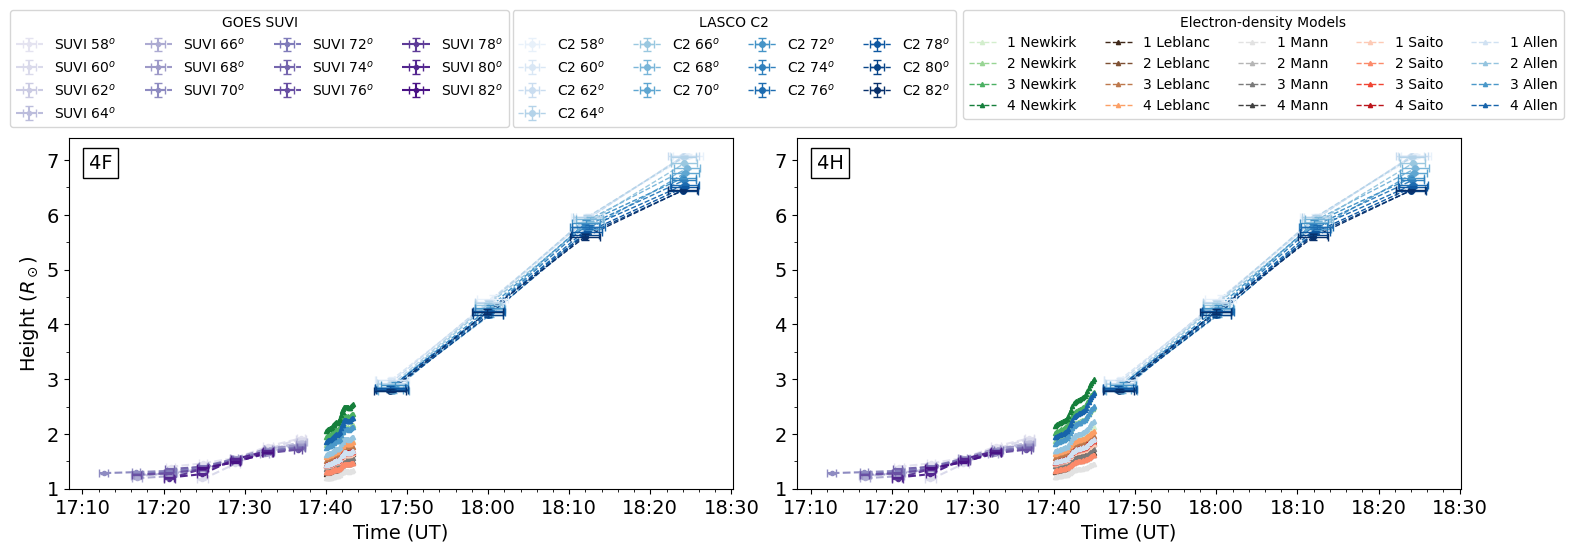

In [157]:
burst_num = 4

# --- Color maps ---
color_schemes = {
    'Newkirk': plt.get_cmap('Greens'),
    'Leblanc': plt.get_cmap('copper'), # Oranges
    'Mann': plt.get_cmap('Greys'),
    'Saito': plt.get_cmap('Reds'),
    'Allen': plt.get_cmap('Blues')
}

# shades: 4 per model
model_colors = {name: [cmap(i / 5) for i in range(1, 5)] for name, cmap in color_schemes.items()}

# --- SUVI colors ---
cmap_suvi = plt.get_cmap('Purples')
color_offset = 3
colors_suvi = [
    cmap_suvi((i + color_offset) / (len(suvi_filenames) + color_offset))
    for i in range(len(suvi_filenames))
]

# --- Data selection ---
SRB = [f for f in radio_filenames if os.path.basename(f).startswith(f'heights_newest_{burst_num}')]
print(SRB)

# --- Cache SUVI data ---
suvi_data = []
for suvifile in suvi_filenames:
    df_suvi = pd.read_csv(suvifile)
    PA = int(suvifile.split('slit')[-1][1:4]) - 90
    suvi_data.append((PA, df_suvi))

fig = plt.figure(figsize=[15,8])

all_handles, all_labels = [], []

# --- Main plotting ---
for k, file in enumerate(sorted(SRB), start=1):
    df_radio = pd.read_csv(file)
    x = df_radio['Time']
    ax = fig.add_subplot(2, 2, k)

    # SUVI curves
    for i, (PA, df_suvi) in enumerate(suvi_data):
        h = ax.errorbar(
            df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
            xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
            markersize=3, linewidth=1.5, fmt='o--', capsize=3, capthick=1,
            barsabove=True, color=colors_suvi[i], ecolor=colors_suvi[i],
            label=rf"SUVI {PA}$^o$"
        )
        if k == 1:
            all_handles.append(h)
            all_labels.append(rf"SUVI: {PA}$^o$")

    # RADIO curves grouped by model
    for model in model_colors.keys():
        cols = [c for c in df_radio.columns if model in c]
        for j, col in enumerate(cols):
            y = df_radio[col]
            c = model_colors[model][j % len(model_colors[model])]
            h = ax.errorbar(
                x, y, markersize=3, linewidth=1, fmt='^--',
                capsize=3, capthick=1, barsabove=True,
                color=c, ecolor=c, label=col, zorder=100
            )
            if k == 1:
                all_handles.append(h)
                all_labels.append(col)

    
    # LASCO C2 CURVES ...
    for i, c2file in enumerate(c2_paths_filtered):
        df_c2 = pd.read_csv(c2file)

        # rename the slit angle to be PA
        PA = int(c2file.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_c2['x_mean'], df_c2['y_mean']/rsun_lasco_c2,
                    xerr=df_c2['x_err'], yerr=df_c2['y_err']/rsun_lasco_c2,
                    markersize=4, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_c2[i],
                    ecolor=colors_c2[i], label=f'C2 {PA}$^o$')
    
    # Annotate subplot
    lane_name = file.split('/')[-1].split('_')[2].split('.')[0]
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, va='top', bbox=dict(facecolor='white', edgecolor='black'))
    
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.set_ylim(bottom=1)
    
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    
    if burst_num == 1 and k <= 2:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Time (UT)')


# Get all handles and labels
handles, labels = ax.get_legend_handles_labels()

# --- Group 1: SUVI (This remains separate) ---
suvi_handles = [h for h, l in zip(handles, labels) if l.startswith('SUVI')]
suvi_labels = [l for l in labels if l.startswith('SUVI')]

fig.legend(suvi_handles, suvi_labels,
           loc='upper left', bbox_to_anchor=(0, 1.15),
           bbox_transform=fig.transFigure, ncol=4, title='GOES SUVI')

# --- Group 2: C2 (This remains separate) ---
c2_handles = [h for h, l in zip(handles, labels) if l.startswith('C2')]
c2_labels = [l for l in labels if l.startswith('C2')]

fig.legend(c2_handles, c2_labels,
           loc='upper left', bbox_to_anchor=(0.335, 1.15),
           bbox_transform=fig.transFigure, ncol=4, title='LASCO C2')

# --- Group 3: Models ---

# Helper function to sort
def sort_by_label(handles_list, labels_list):
    """Sorts handle/label pairs based on the label text."""
    try:
        zipped = sorted(zip(handles_list, labels_list), key=lambda item: item[1])
        handles_sorted, labels_sorted = zip(*zipped)
        return list(handles_sorted), list(labels_sorted)
    except ValueError:
        return [], []

# Step 1: Create and Sort 5 separate lists
newkirk_h, newkirk_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Newkirk' in l],
    [l for l in labels if 'Newkirk' in l]
)
leblanc_h, leblanc_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Leblanc' in l],
    [l for l in labels if 'Leblanc' in l]
)
mann_h, mann_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Mann' in l],
    [l for l in labels if 'Mann' in l]
)
saito_h, saito_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Saito' in l],
    [l for l in labels if 'Saito' in l]
)
allen_h, allen_l = sort_by_label(
    [h for h, l in zip(handles, labels) if 'Allen' in l],
    [l for l in labels if 'Allen' in l]
)

# Step 2: Concatenate (join) the lists in model order
# This creates the list: [N1, N2, N3, N4, L1, L2, L3, L4, ...]
final_model_handles = newkirk_h + leblanc_h + mann_h + saito_h + allen_h
final_model_labels = newkirk_l + leblanc_l + mann_l + saito_l + allen_l

# Step 3: Create the legend
# This WILL produce the diagonal layout from your screenshot
fig.legend(final_model_handles, final_model_labels,
           loc='upper right', bbox_to_anchor=(1.045, 1.15),
           bbox_transform=fig.transFigure,
           ncol=5,  
           title='Electron-density Models')

fig.tight_layout()
fig.savefig(f'{data_dir}/fourth_SRB_lascoC2.pdf',format='pdf', bbox_inches='tight')
plt.show()

## Est. Acceleration profiles

In [174]:
import numpy as np
from scipy.signal import savgol_filter

In [175]:
suvi_data[0][1]

Unnamed: 0          time     distance     x_err      y_err        x_mean  \
0           0  19857.722812  1329.943086  0.000418  11.993931  19857.722812   
1           1  19857.725562  1388.577917  0.000338   8.616805  19857.725562   
2           2  19857.728401  1483.559485  0.000428  15.773112  19857.728401   
3           3  19857.731135  1681.409179  0.000435  24.621586  19857.731135   
4           4  19857.733990  1824.738766  0.000363  10.712343  19857.733990   

        y_mean   distance_km  distance_diff_km  \
0  1329.943086  9.748493e+05               NaN   
1  1388.577917  1.017829e+06      42979.375266   
2  1483.559485  1.087450e+06      69621.561103   
3  1681.409179  1.232474e+06     145023.973850   
4  1824.738766  1.337535e+06     105060.695094   

                           datetime  time_diff_s  speed_km_s  
0  2024-05-14 17:20:50.978132+00:00          NaN         NaN  
1  2024-05-14 17:24:48.578132+00:00   237.600000  180.889627  
2  2024-05-14 17:28:53.842648+00:00   245.264516  283.863162  
3  2024-05-14 17:32:50.049099+00:00   236.206451  613.971266  
4  2024-05-14 17:36:56.707164+00:00   246.658065  425.936590

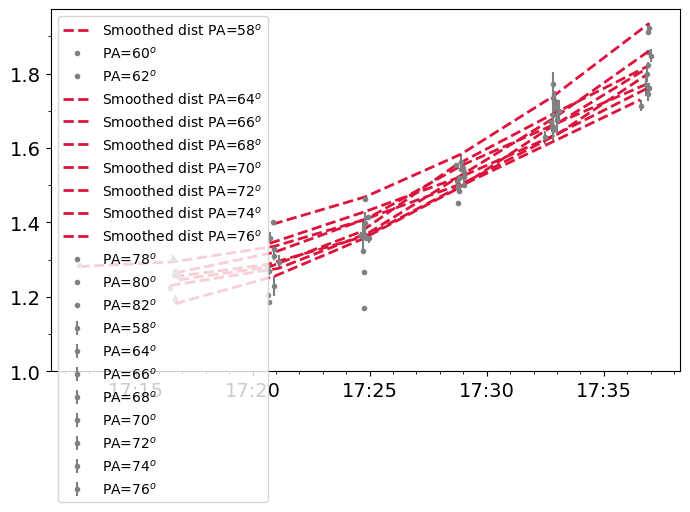

In [187]:
fig = plt.figure(figsize=[7,5])
ax  = fig.add_subplot(111)

# SUVI curves
for i, (PA, df_suvi) in enumerate(suvi_data):
    time = df_suvi['x_mean']
    dist = df_suvi['y_mean']/rsun_suvi
    
    # Apply Savitzky-Golay filter
    if len(dist) >= 5:
        window_length = min(len(dist) if len(dist)%2==1 else len(dist)-1, 11)
        polyorder = 2 if window_length > 2 else 1
        dist_smooth = savgol_filter(dist, window_length=window_length, polyorder=polyorder)
    
        # Residual-based error bars
        y_err = np.abs(dist - dist_smooth)
    
        # Plot original with error bars from residuals
        ax.errorbar(time, dist, yerr=y_err, fmt='o', ms=3, color='gray', label=rf'PA={PA}$^o$')
    
        # Smoothed curve
        ax.plot(time, dist_smooth, '--', lw=2, color='crimson', label=rf'Smoothed dist PA={PA}$^o$')
    
    else:
        ax.plot(time, dist, 'o', ms=3, color='gray', label=rf'PA={PA}$^o$')

ax.legend()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_ylim(bottom=1)
fig.tight_layout()
plt.show()

In [190]:
print(PA)
print('time:', time)
print('diffs:', np.diff(mdates.date2num(time)) * 24 * 3600)

58
time: [19857.72281225 19857.72556225 19857.72840096 19857.73113483
 19857.73398967]
diffs: [0. 0. 0. 0.]


In [191]:
time

array([19857.72281225, 19857.72556225, 19857.72840096, 19857.73113483,
       19857.73398967])

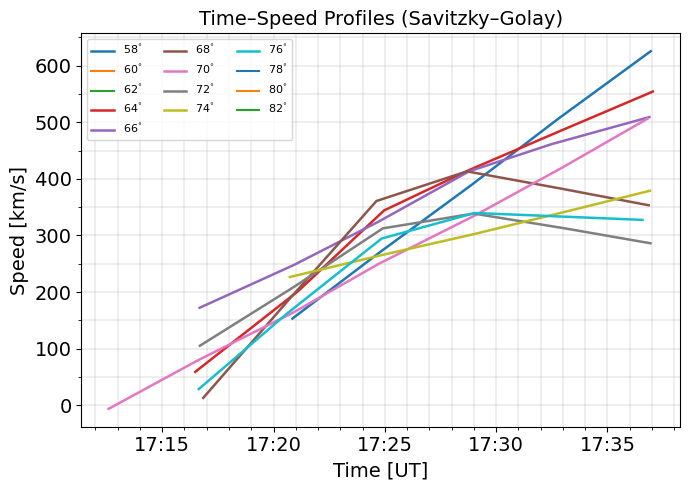

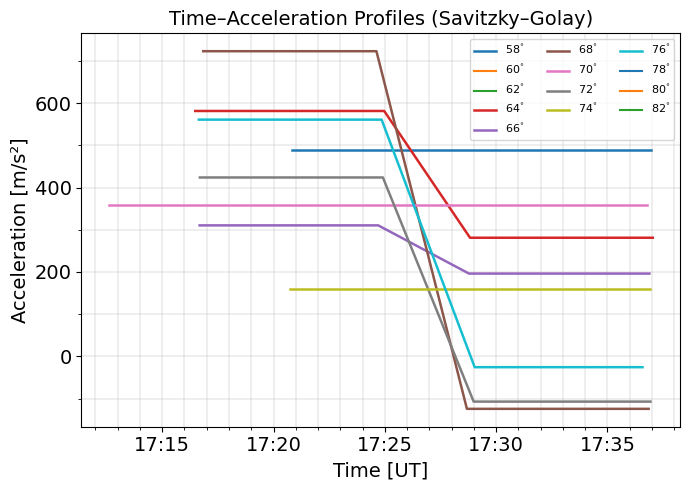

In [194]:
from scipy.signal import savgol_filter
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
import numpy as np


Rsun_km = 6.957e5     # km
Rsun_m  = 6.957e8     # m


fig_speed, ax_speed = plt.subplots(figsize=[7,5])
fig_acc, ax_acc     = plt.subplots(figsize=[7,5])

for i, (PA, df_suvi) in enumerate(suvi_data):
    time = df_suvi['x_mean']
    dist = df_suvi['y_mean'] / rsun_suvi
    
    if len(dist) >= 5:
        window_length = min(len(dist) if len(dist) % 2 == 1 else len(dist) - 1, 11)
        polyorder = 2 if window_length > 2 else 1

        # smooth the distance
        dist_smooth = savgol_filter(dist, window_length=window_length, polyorder=polyorder)

        # compute first and second derivatives (velocity and acceleration)
        # 'delta' is time spacing in seconds (convert timedeltas to seconds)
        # dt = np.median(np.diff(mdates.date2num(time))) * 24 * 3600  # sec
        dt = np.median(np.diff(time)) * 24 * 3600  # sec
        speed = savgol_filter(dist, window_length=window_length, polyorder=polyorder, deriv=1, delta=dt)
        acc   = savgol_filter(dist, window_length=window_length, polyorder=polyorder, deriv=2, delta=dt)
        
        # convert units
        speed_kms = speed * Rsun_km       # km/s
        acc_ms2   = acc   * Rsun_m        # m/s²

        # plot speed
        ax_speed.plot(time, speed_kms, lw=1.8, label=rf'{PA}$^°$')
        # plot acceleration
        ax_acc.plot(time, acc_ms2, lw=1.8, label=rf'{PA}$^°$')

    else:
        ax_speed.plot(time, np.full_like(time, np.nan), label=rf'{PA}$^°$')
        ax_acc.plot(time, np.full_like(time, np.nan), label=rf'{PA}$^°$')

# formatting
for ax in [ax_speed, ax_acc]:
    ax.legend(fontsize=8, ncol=3)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.grid(True, which='both', lw=0.3)

ax_speed.set_ylabel('Speed [km/s]')
ax_speed.set_xlabel('Time [UT]')
ax_speed.set_title('Time–Speed Profiles (Savitzky–Golay)')

ax_acc.set_ylabel('Acceleration [m/s²]')
ax_acc.set_xlabel('Time [UT]')
ax_acc.set_title('Time–Acceleration Profiles (Savitzky–Golay)')

fig_speed.tight_layout()
fig_acc.tight_layout()
plt.show()

In [115]:
c2_click_filenames = sorted(glob.glob(f'{data_dir}/jplots/lasco_C2/clicking/*.csv'))
print(len(c2_click_filenames), *c2_click_filenames, sep='\n')

16
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_130.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_148.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_150.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_152.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_154.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_156.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_158.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_160.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_162.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_164.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_166.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_168.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_L

130, 190, 195 slits are not needed.

In [116]:
c3_click_filenames = sorted(glob.glob(f'{data_dir}/jplots/lasco_C3/clicking/*.csv'))
print(len(c3_click_filenames), *c3_click_filenames, sep='\n')

13
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_148.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_150.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_152.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_154.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_156.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_158.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_160.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_162.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_164.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_166.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_168.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_170.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_L

In [117]:
df_c2 = pd.read_csv(c2_click_filenames[0])
df_c2.head()

Unnamed: 0          time     distance     x_err      y_err        x_mean  \
0           0  19857.741721  2364.079332  0.001546  37.413663  19857.741721   
1           1  19857.749948  3660.339476  0.001491  48.611951  19857.749948   
2           2  19857.758373  5037.803852  0.001464  56.436923  19857.758373   
3           3  19857.766617  6291.958098  0.001445  71.409859  19857.766617   
4           4  19857.774910  7188.212211  0.001427  47.279540  19857.774910   

        y_mean   distance_km  distance_diff_km  \
0  2364.079332  1.733109e+06               NaN   
1  3660.339476  2.683399e+06      9.502897e+05   
2  5037.803852  3.693219e+06      1.009821e+06   
3  6291.958098  4.612641e+06      9.194218e+05   
4  7188.212211  5.269686e+06      6.570449e+05   

                           datetime  time_diff_s   speed_km_s  
0  2024-05-14 17:48:04.701006+00:00          NaN          NaN  
1  2024-05-14 17:59:55.546952+00:00   710.845946  1336.843408  
2  2024-05-14 18:12:03.453200+00:00   727.906248  1387.294902  
3  2024-05-14 18:23:55.720838+00:00   712.267638  1290.837585  
4  2024-05-14 18:35:52.253552+00:00   716.532714   916.978178

In [118]:
df_c3 = pd.read_csv(c3_click_filenames[0])
df_c3.head()

Unnamed: 0          time      distance   distance_km  distance_diff_km  \
0           0  19857.753933   4693.726809  3.440985e+06               NaN   
1           1  19857.762375   6160.146104  4.516022e+06      1.075036e+06   
2           2  19857.770753   7587.975417  5.562767e+06      1.046746e+06   
3           3  19857.778747   9035.099722  6.623659e+06      1.060891e+06   
4           4  19857.787253  10250.684137  7.514807e+06      8.911486e+05   

                           datetime  time_diff_s   speed_km_s  
0  2024-05-14 18:05:39.809924+00:00          NaN          NaN  
1  2024-05-14 18:17:49.192020+00:00   729.382096  1473.900139  
2  2024-05-14 18:29:53.048494+00:00   723.856474  1446.068357  
3  2024-05-14 18:41:23.751236+00:00   690.702742  1535.959093  
4  2024-05-14 18:53:38.658953+00:00   734.907717  1212.599285

In [119]:
c2_paths_filtered = [
    path for path in c2_click_filenames 
    if 148 <= int(path.split('_')[-1].split('.')[0]) <= 172
]
print(*c2_paths_filtered, sep='\n')

/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_148.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_150.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_152.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_154.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_156.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_158.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_160.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_162.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_164.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_166.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_168.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_170.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASC

In [122]:
# last_SRB = [f for f in updated_radio_filenames if os.path.basename(f).startswith('hs_4')]
last_SRB = [f for f in radio_filenames if os.path.basename(f).startswith('heights_newest_4')]
last_SRB

['/home/mnedal/data/csv_files/SRB_heights/heights_newest_4F.csv',
 '/home/mnedal/data/csv_files/SRB_heights/heights_newest_4H.csv']

IndexError: list index out of range

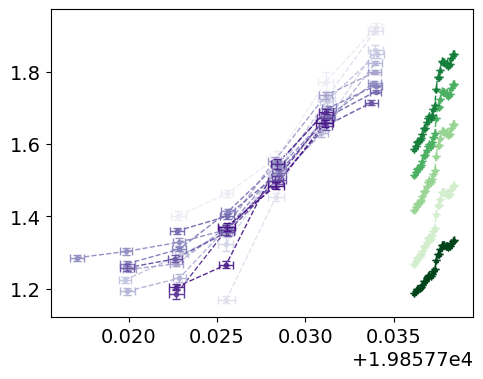

In [124]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples')
color_offset = 2
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]

cmap_c2 = plt.get_cmap('Blues')
colors_c2 = [cmap_c2(i / len(c2_paths_filtered)) for i in range(1, len(c2_paths_filtered)+1)]


fig = plt.figure(figsize=[12,4])

# RADIO CURVES ...
for k, file in enumerate(sorted(last_SRB), start=1):
    df_radio = pd.read_csv(file)
    # df_radio.drop('Modified Newkirk', axis=1, inplace=True)
    x = df_radio['Time']
    
    ax = fig.add_subplot(1, 2, k)
    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)

        # rename the slit angle to be PA
        PA = int(suvifile.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=rf"SUVI: {PA}$^o$")
    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'crimson'
        elif col == 'Allen':
            curve_color = 'dodgerblue'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)
    lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    
    # LASCO C2 CURVES ...
    for i, c2file in enumerate(c2_paths_filtered):
        df_c2 = pd.read_csv(c2file)

        # rename the slit angle to be PA
        PA = int(c2file.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_c2['x_mean'], df_c2['y_mean']/rsun_lasco_c2,
                    xerr=df_c2['x_err'], yerr=df_c2['y_err']/rsun_lasco_c2,
                    markersize=4, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_c2[i],
                    ecolor=colors_c2[i], label=f"C2: Slit {PA}$^o$")

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.set_ylim(bottom=1)
    ax.set_xlabel('Time (UT)')
    # Remove y-axis labels for the second column
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')

# Add a single legend box for the whole figure, split into three parts ...
# Get all handles and labels
handles, labels = ax.get_legend_handles_labels()

# Split the legend into three parts: purple, green/colored, and blue
purple_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('SUVI')]
purple_labels = [label for label in labels if label.startswith('SUVI')]

green_handles = [handles[i] for i, label in enumerate(labels) if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito', 'Allen']]
green_labels = [label for label in labels if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito', 'Allen']]

blue_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('C2')]
blue_labels = [label for label in labels if label.startswith('C2')]

# Add the purple labels to the left
fig.legend(purple_handles, purple_labels,
           loc='upper center', bbox_to_anchor=(0.2, 1.35),
           bbox_transform=fig.transFigure, ncol=3, title='GOES SUVI')

# Add the green and colored labels to the middle
fig.legend(green_handles, green_labels,
           loc='upper center', bbox_to_anchor=(0.5, 1.35),
           bbox_transform=fig.transFigure, ncol=2, title='Electron-density Models')

# Add the blue labels to the right
fig.legend(blue_handles, blue_labels,
           loc='upper center', bbox_to_anchor=(0.8, 1.35),
           bbox_transform=fig.transFigure, ncol=3, title='SOHO LASCO C2')

# Adjust layout to leave space for legends
fig.tight_layout(rect=[0, 0, 1, 0.85])

fig.tight_layout()
fig.savefig('/home/mnedal/data/last_SRB.pdf', format='pdf', bbox_inches='tight')
plt.show()

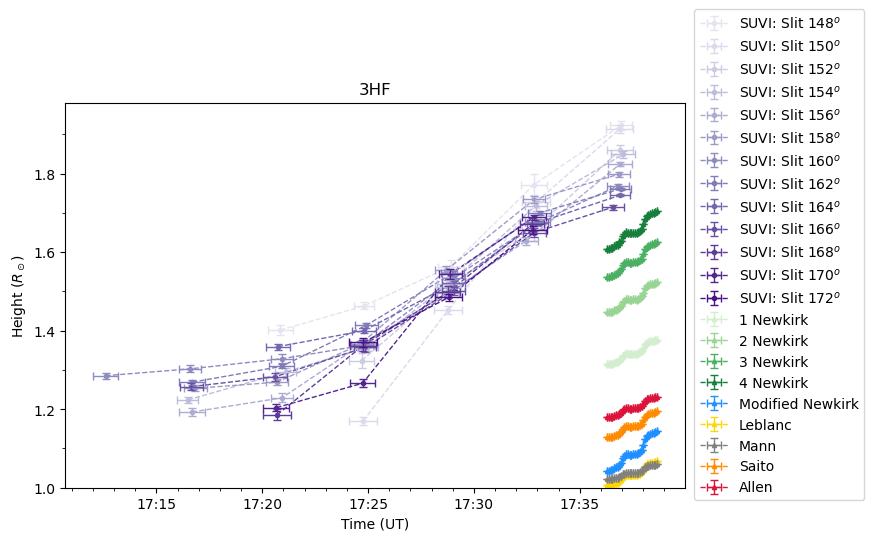

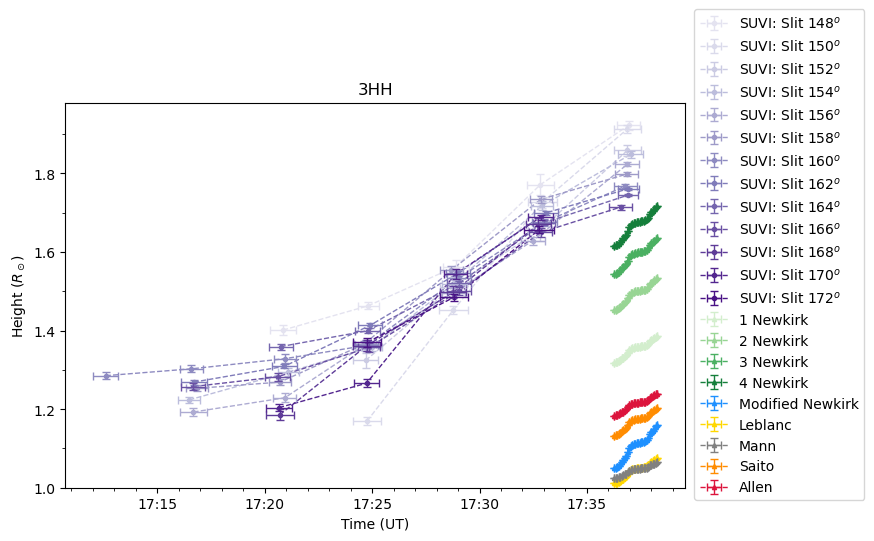

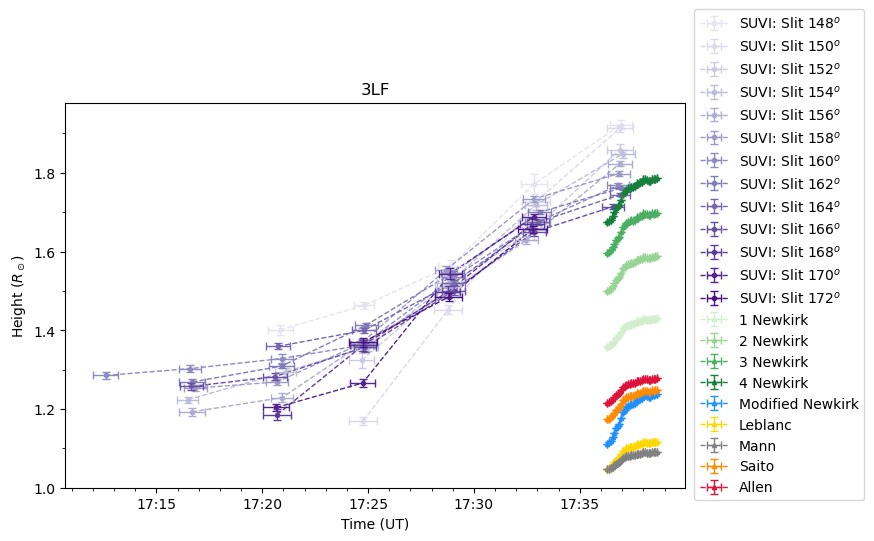

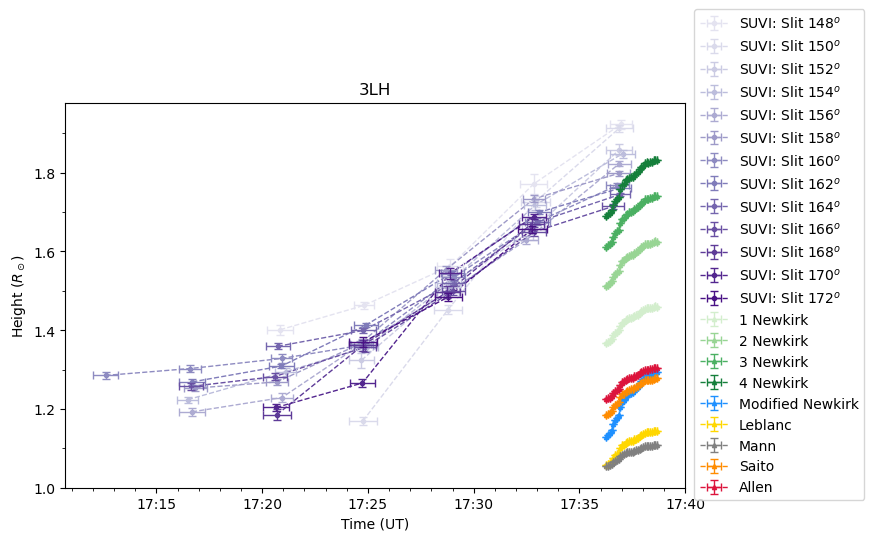

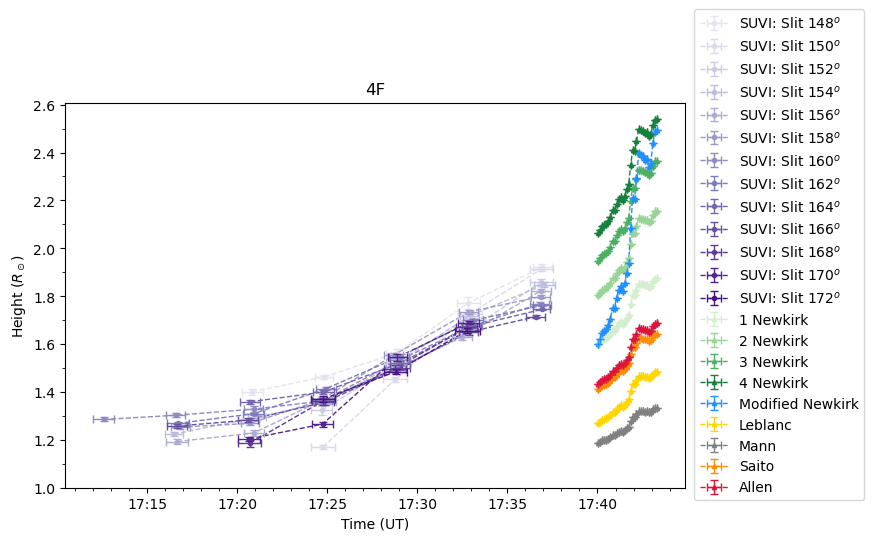

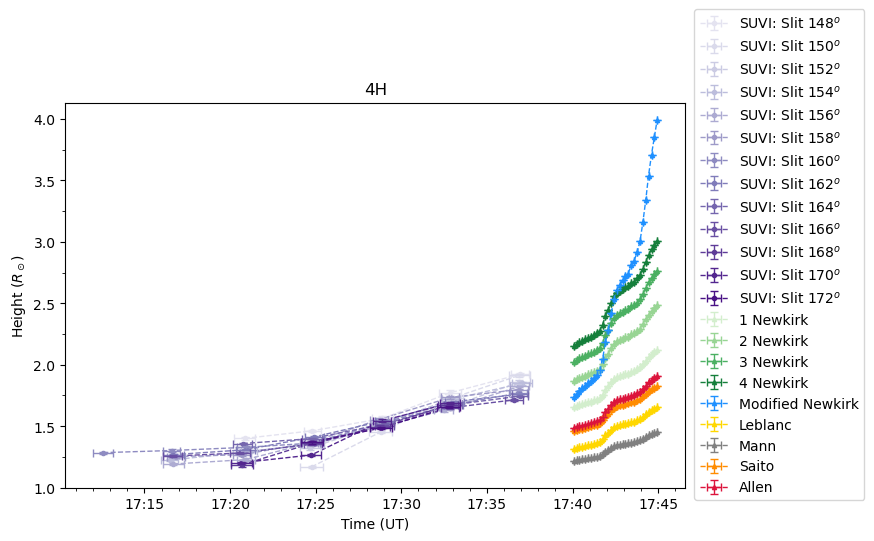

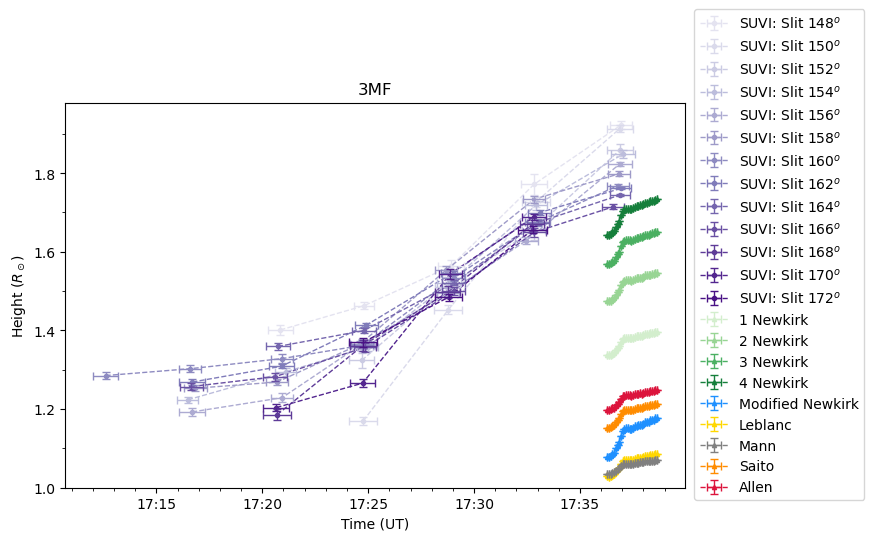

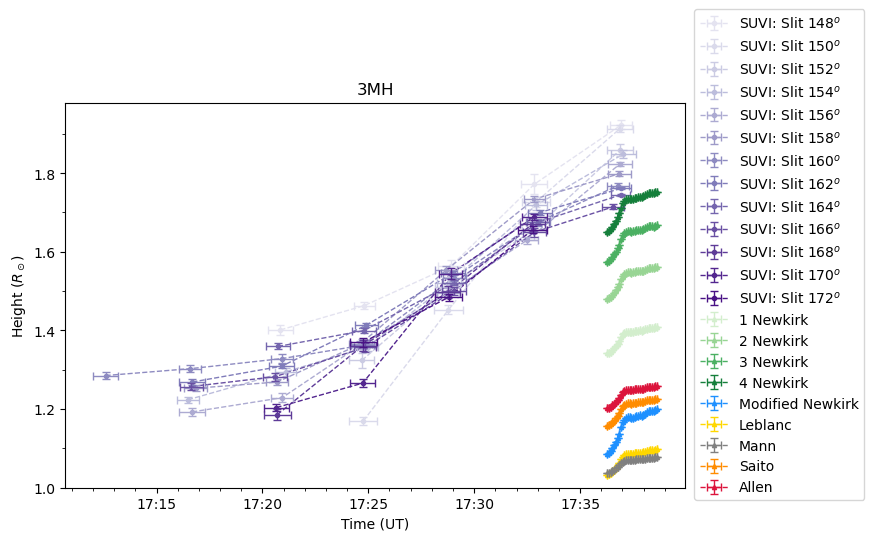

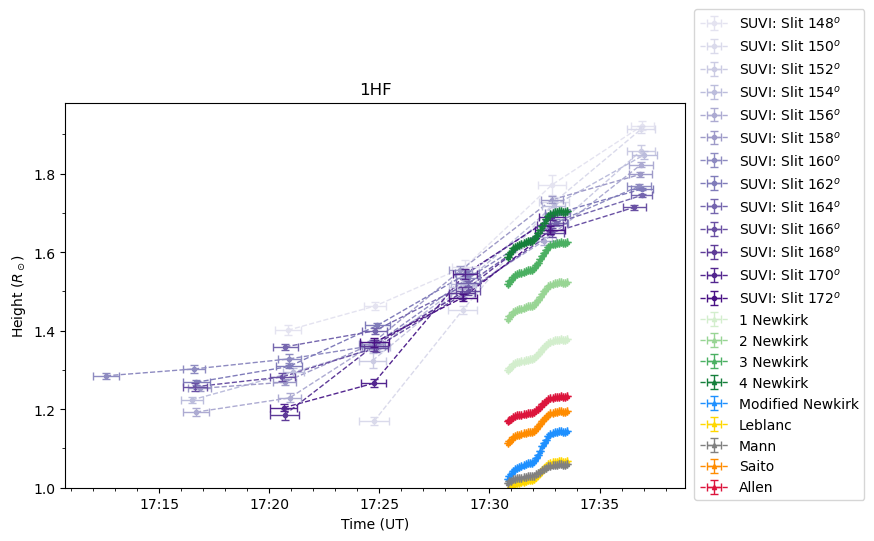

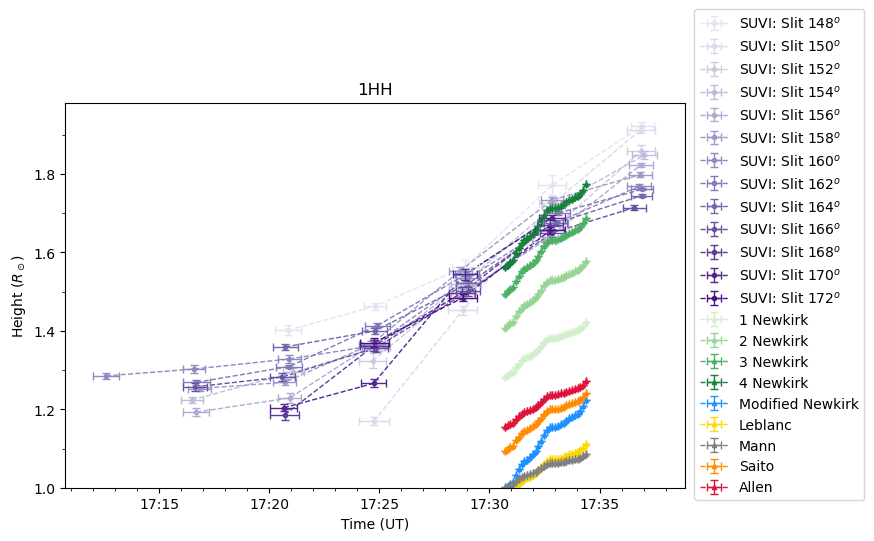

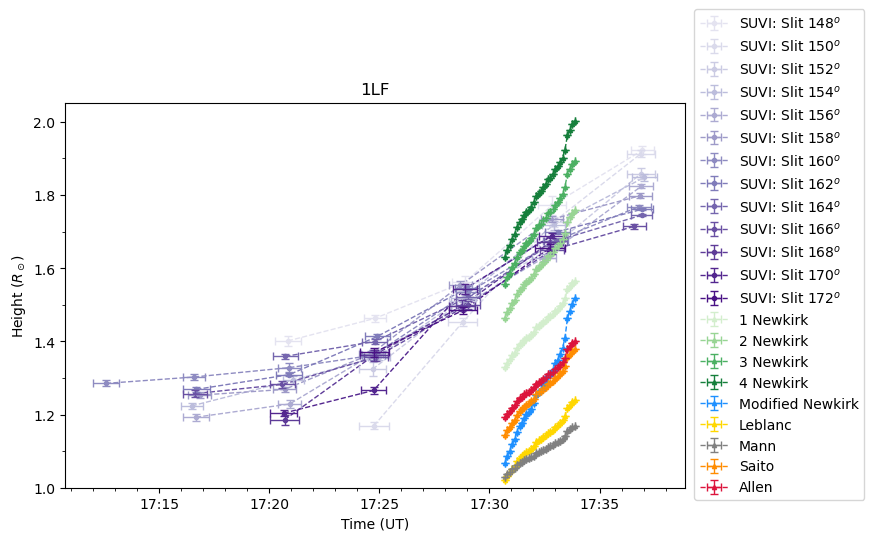

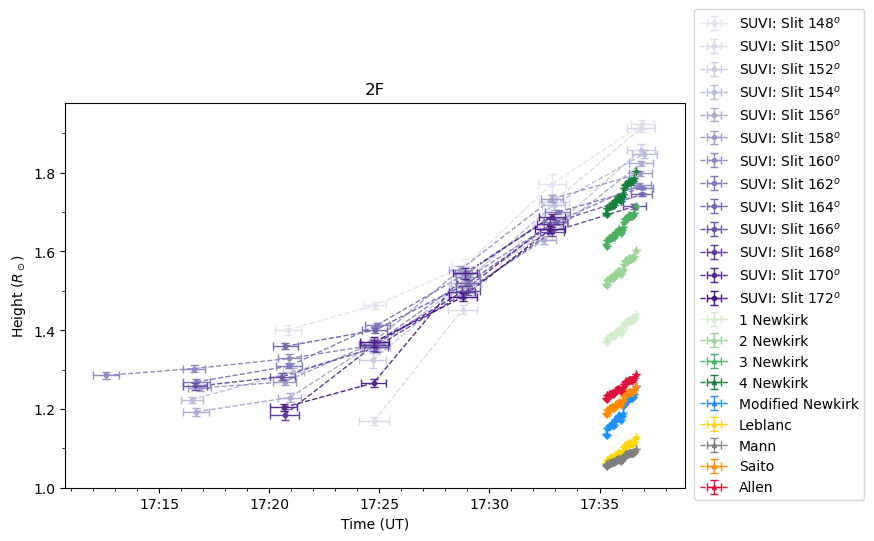

In [35]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples') # Purples, Greys
color_offset = 3
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]


# RADIO CURVES ...
for file in updated_radio_filenames:
    df_radio = pd.read_csv(file)    
    # x = df_radio['Time']
    x = df_radio['Time']
    # newkirk1 = df_radio['1 Newkirk']
    # newkirk2 = df_radio['2 Newkirk']
    # newkirk3 = df_radio['3 Newkirk']
    # newkirk4 = df_radio['4 Newkirk']
    # mod_newkirk = df_radio['Modified Newkirk']
    # leblanc = df_radio['Leblanc']
    # mann = df_radio['Mann']
    # saito = df_radio['Saito']
    # allen = df_radio['Allen']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)

    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=f"SUVI: Slit {suvifile.split('slit')[-1][1:4]}$^o$")

    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Modified Newkirk':
            curve_color = 'dodgerblue'
        elif col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'darkorange'
        elif col == 'Allen':
            curve_color = 'crimson'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)

    ax.set_title(f"{file.split('/')[-1].split('_')[1].split('.')[0]}")
    ax.legend(loc='lower right', bbox_to_anchor=(1.3,-0.05))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    # output_filename = f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_radio/suvi_{file.split('/')[-1].split('_')[1].split('.')[0]}"
    # fig.savefig(f'{output_filename}.pdf', format='pdf', bbox_inches='tight')
    # fig.savefig(f'{output_filename}.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

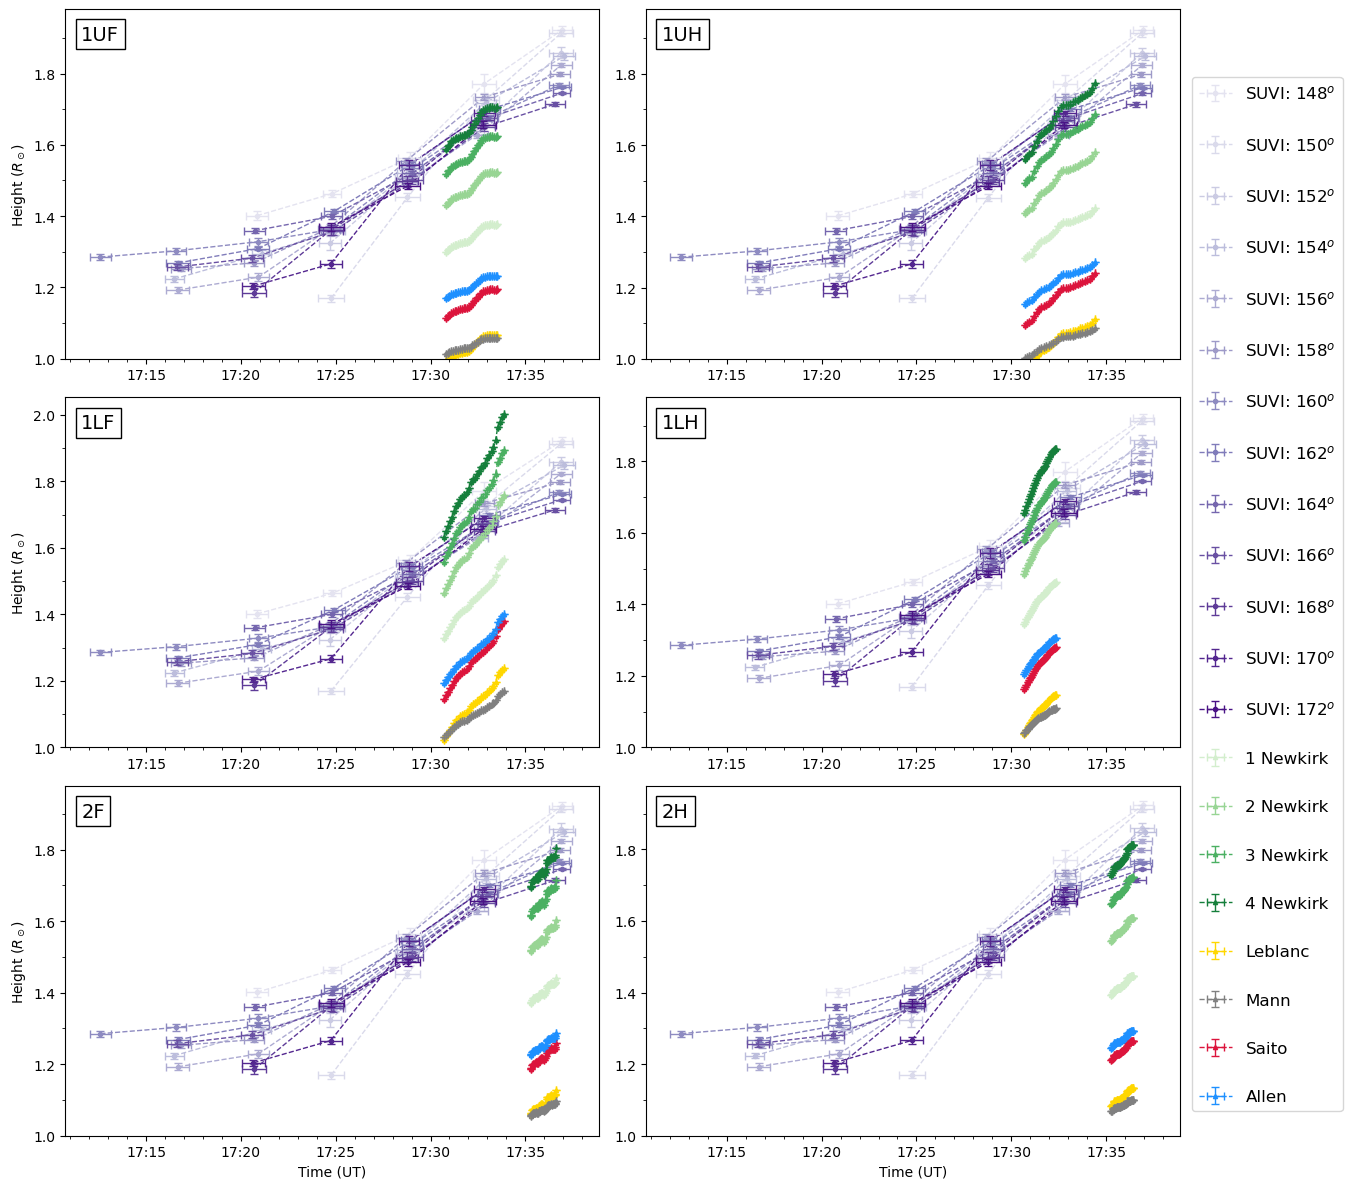

In [14]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples') # Purples, Greys
color_offset = 3
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]

fig = plt.figure(figsize=[12,12])

# RADIO CURVES ...
for k, file in enumerate(sorted(updated_radio_filenames)[:6], start=1):
    df_radio = pd.read_csv(file)
    df_radio.drop('Modified Newkirk', axis=1, inplace=True)
    x = df_radio['Time']
    
    ax = fig.add_subplot(3, 2, k)
    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=rf"SUVI: {suvifile.split('slit')[-1][1:4]}$^o$")
    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'crimson'
        elif col == 'Allen':
            curve_color = 'dodgerblue'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)
    lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
    # ax.set_title(lane_name)
    if lane_name == '1HF':
        lane_name = '1UF'
    elif lane_name == '1HH':
        lane_name = '1UH'
    elif lane_name == '3HF':
        lane_name = '3UF'
    elif lane_name == '3HH':
        lane_name = '3UH'
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)
    # ax.set_xlim(left=pd.Timestamp('2024-05-14 17:20'), right=pd.Timestamp('2024-05-14 18:05'))
    
    # Remove y-axis labels for the second column
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    
    # Remove x-axis labels except for the last two panels
    if k <= 4:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Time (UT)')

# # Add a single legend box for the whole figure
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='center right',
#            bbox_to_anchor=(1.13, 0.5),
#            bbox_transform=fig.transFigure,
#            # borderpad=10,
#            # labelspacing=2,
#            # handlelength=15,
#            # handleheight=15,
#            # handletextpad=15,
#            fontsize='large'
# )
# Add a single legend box for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',
           bbox_to_anchor=(1.13, 0.5),
           bbox_transform=fig.transFigure,
           labelspacing=2,
           fontsize='large'
)
fig.tight_layout()
# fig.savefig('/home/mnedal/data/Jplots_profiles1.pdf', format='pdf', bbox_inches='tight')
plt.show()

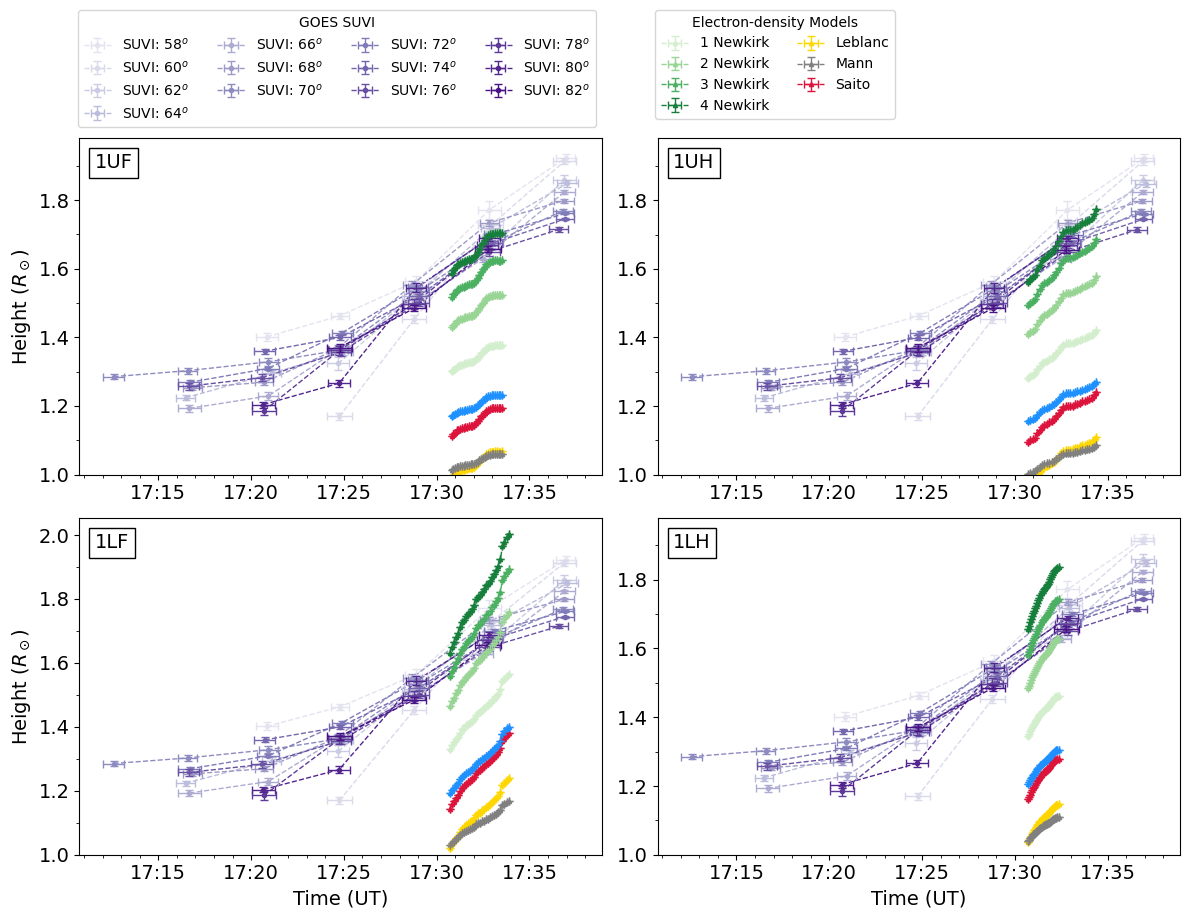

In [73]:
burst_num = 1

cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples') # Purples, Greys
color_offset = 3
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]


# Extract filenames that start with '1'
first_SRB = [f for f in updated_radio_filenames if os.path.basename(f).startswith(f'hs_{burst_num}')]

fig = plt.figure(figsize=[12,8])

# RADIO CURVES ...
for k, file in enumerate(sorted(first_SRB), start=1):
    df_radio = pd.read_csv(file)
    df_radio.drop('Modified Newkirk', axis=1, inplace=True)
    x = df_radio['Time']
    
    ax = fig.add_subplot(2, 2, k)
    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)

        # rename the slit angle to be PA
        PA = int(suvifile.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=rf"SUVI: {PA}$^o$")
    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'crimson'
        elif col == 'Allen':
            curve_color = 'dodgerblue'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)
    lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
    if lane_name == '1HF':
        lane_name = '1UF'
    elif lane_name == '1HH':
        lane_name = '1UH'
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)
    ax.set_xlabel('Time (UT)')
    
    # Remove y-axis labels for the second column
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    
    # Remove x-axis labels except for the last two panels
    if burst_num == 1:
        if k <= 2:
            ax.set_xlabel('')
        else:
            ax.set_xlabel('Time (UT)')

# # Add a single legend box for the whole figure
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='center right',
#            bbox_to_anchor=(1.13, 0.525),
#            bbox_transform=fig.transFigure,
#            labelspacing=1,
#            fontsize='large')

# Add a single legend box for the whole figure, split into three parts ...
# Get all handles and labels
handles, labels = ax.get_legend_handles_labels()

# Split the legend into three parts: purple, green/colored, and blue
purple_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('SUVI')]
purple_labels = [label for label in labels if label.startswith('SUVI')]

green_handles = [handles[i] for i, label in enumerate(labels) if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito']]
green_labels = [label for label in labels if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito']]

# Add the purple labels to the left
fig.legend(purple_handles, purple_labels,
           loc='upper center', bbox_to_anchor=(0.285, 1.15),
           bbox_transform=fig.transFigure, ncol=4, title='GOES SUVI')

# Add the green and colored labels to the middle
fig.legend(green_handles, green_labels,
           loc='upper center', bbox_to_anchor=(0.65, 1.15),
           bbox_transform=fig.transFigure, ncol=2, title='Electron-density Models')

fig.tight_layout()
# fig.savefig(f'/home/mnedal/data/SRB_{burst_num}.pdf', format='pdf', bbox_inches='tight')
plt.show()

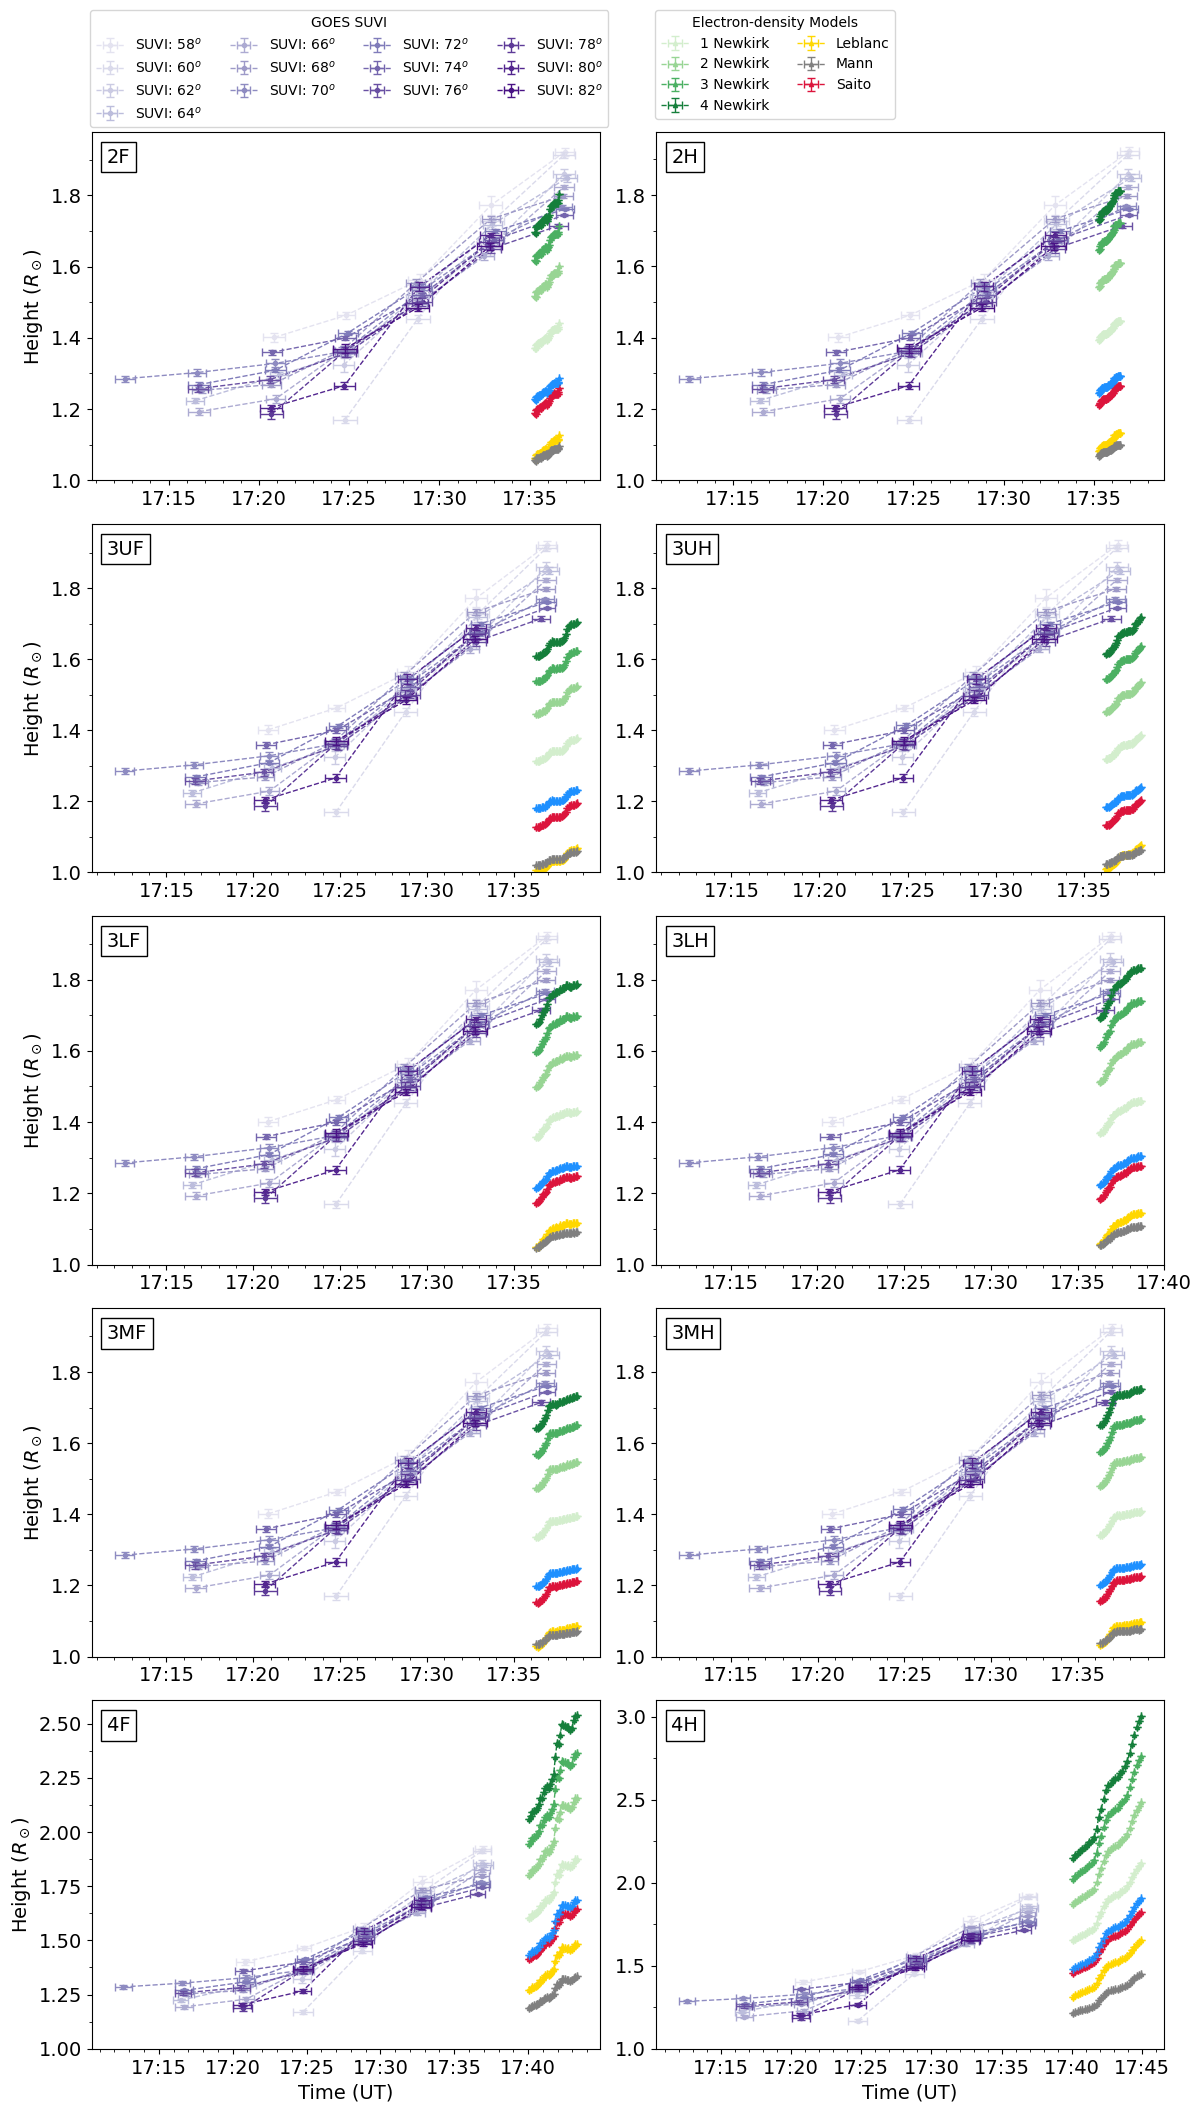

In [85]:
remaining_SRB = [f for f in updated_radio_filenames if not os.path.basename(f).startswith('hs_1')]

fig = plt.figure(figsize=[12,20])

# RADIO CURVES ...
for k, file in enumerate(sorted(remaining_SRB), start=1):
    df_radio = pd.read_csv(file)
    df_radio.drop('Modified Newkirk', axis=1, inplace=True)
    x = df_radio['Time']
    
    ax = fig.add_subplot(5, 2, k)
    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)

        # rename the slit angle to be PA
        PA = int(suvifile.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=rf"SUVI: {PA}$^o$")
    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'crimson'
        elif col == 'Allen':
            curve_color = 'dodgerblue'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)
    lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
    if lane_name == '3HF':
        lane_name = '3UF'
    elif lane_name == '3HH':
        lane_name = '3UH'
    
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)    
    # Remove y-axis labels for the second column
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    
    # Remove x-axis labels except for the last two panels
    if k <= 8:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Time (UT)')

# Add a single legend box for the whole figure, split into three parts ...
# Get all handles and labels
handles, labels = ax.get_legend_handles_labels()

# Split the legend into three parts: purple, green/colored, and blue
purple_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('SUVI')]
purple_labels = [label for label in labels if label.startswith('SUVI')]

green_handles = [handles[i] for i, label in enumerate(labels) if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito']]
green_labels = [label for label in labels if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito']]

# Add the purple labels to the left
fig.legend(purple_handles, purple_labels,
           loc='upper center', bbox_to_anchor=(0.285, 1.057),
           bbox_transform=fig.transFigure, ncol=4, title='GOES SUVI')

# Add the green and colored labels to the middle
fig.legend(green_handles, green_labels,
           loc='upper center', bbox_to_anchor=(0.64, 1.057),
           bbox_transform=fig.transFigure, ncol=2, title='Electron-density Models')

fig.tight_layout()
fig.savefig('/home/mnedal/data/remaining_SRBs.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [117]:
# Radio emission heights
radio_heights = []
for k, file in enumerate(sorted(updated_radio_filenames)):
    df_radio = pd.read_csv(file)
    # store the heights to find out max and min
    radio_heights.append(df_radio['4 Newkirk'].values)

print(f'Min-Max heights of type II radio emission via 4x Newkirk: {np.min(radio_heights):.2f} - {np.max(radio_heights):.2f} Rsun')

Min-Max heights of type II radio emission via 4x Newkirk: 1.56 - 3.01 Rsun


In [118]:
df_radio.head()

Unnamed: 0          Time  1 Newkirk  2 Newkirk  3 Newkirk  4 Newkirk  \
0           0  19857.736162   1.654056   1.869538   2.023760   2.149573   
1           1  19857.736272   1.664064   1.882333   2.038762   2.166506   
2           2  19857.736386   1.672618   1.893286   2.051617   2.181028   
3           3  19857.736502   1.679459   1.902055   2.061919   2.192674   
4           4  19857.736619   1.687187   1.911974   2.073580   2.205866   

   Modified Newkirk   Leblanc      Mann     Saito     Allen  
0          1.736999  1.313065  1.216966  1.459127  1.481971  
1          1.764304  1.321288  1.222412  1.467968  1.491270  
2          1.788064  1.328282  1.227054  1.475486  1.499219  
3          1.807349  1.333852  1.230756  1.481473  1.505576  
4          1.829448  1.340121  1.234930  1.488210  1.512756

In [119]:
# LASCO C2 heights
c2_heights = []
for i, c2file in enumerate(c2_paths_filtered):
    df_c2 = pd.read_csv(c2file)
    # rename the slit angle to be PA
    PA = int(c2file.split('slit')[-1][1:4]) - 90
    t = df_c2['x_mean'].mean()
    terr = df_c2['x_err'].mean()
    h = df_c2['y_mean'].mean()/rsun_lasco_c2
    herr = df_c2['y_err'].mean()/rsun_lasco_c2
    # store the heights to find out max and min
    c2_heights.append(df_c2['y_mean'].values/rsun_lasco_c2)
    # print(f'Slit: {PA} deg. \n t = {t:.2f} ± {terr:.3f} \n h = {h:.2f} ± {herr:.3f}')
    # print(30*'-')

print(f'Min-Max heights of EUV wave in LASCO C2: {np.min(c2_heights):.2f} - {np.max(c2_heights):.2f} Rsun')

Min-Max heights of EUV wave in LASCO C2: 2.78 - 7.08 Rsun


In [29]:
remaining_SRB = [f for f in updated_radio_filenames if not os.path.basename(f).startswith('hs_1')]

fig = plt.figure(figsize=[12,20])

# RADIO CURVES ...
for k, file in enumerate(sorted(remaining_SRB), start=1):
    df_radio = pd.read_csv(file)
    df_radio.drop('Modified Newkirk', axis=1, inplace=True)
    x = df_radio['Time']
    
    ax = fig.add_subplot(5, 2, k)
    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)

        # rename the slit angle to be PA
        PA = int(suvifile.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=rf"SUVI: {PA}$^o$")
    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'crimson'
        elif col == 'Allen':
            curve_color = 'dodgerblue'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)
    lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
    if lane_name == '3HF':
        lane_name = '3UF'
    elif lane_name == '3HH':
        lane_name = '3UH'
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)    
    # Remove y-axis labels for the second column
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    
    # Remove x-axis labels except for the last two panels
    if k <= 8:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Time (UT)')

# Add a single legend box for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',
           bbox_to_anchor=(1.13, 0.5),
           bbox_transform=fig.transFigure,
           labelspacing=2,
           fontsize='large')

fig.tight_layout()
fig.savefig('/home/mnedal/data/remaining_SRBs.pdf', format='pdf', bbox_inches='tight')
plt.show()